In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

In [3]:
df = pd.read_csv('/Users/mariemashraf/Documents/DS/168733-383865-bundle-archive/train.csv')

In [4]:
ds = pd.read_csv('/Users/mariemashraf/Documents/DS/168733-383865-bundle-archive/test.csv')

In [5]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [6]:
#delete UniqueID because it useless
df = df.drop(columns=['UniqueID'])
ds = ds.drop(columns=['UniqueID'])

In [7]:
#to make columns in dataframe lower case 
#change seprator from . to _

from scipy.stats import poisson
df.columns= df.columns.str.lower().str.replace('.','_')
ds.columns= ds.columns.str.lower().str.replace('.','_')

In [8]:
df['employment_type'].head(5)

0         Salaried
1    Self employed
2    Self employed
3    Self employed
4    Self employed
Name: employment_type, dtype: object

In [9]:
df['employment_type'].unique()

array(['Salaried', 'Self employed', nan], dtype=object)

In [10]:
df['employment_type'] = df['employment_type'].fillna('Unemployed')
ds['employment_type'] = ds['employment_type'].fillna('Unemployed')

In [11]:
df['employment_type'] = df['employment_type'].replace(('Self employed', 'Salaried', 'Unemployed'), (2, 1, 0))
df['employment_type'].value_counts()

ds['employment_type'] = ds['employment_type'].replace(('Self employed', 'Salaried', 'Unemployed'), (2, 1, 0))
ds['employment_type'].value_counts()

2    59794
1    49155
0     3443
Name: employment_type, dtype: int64

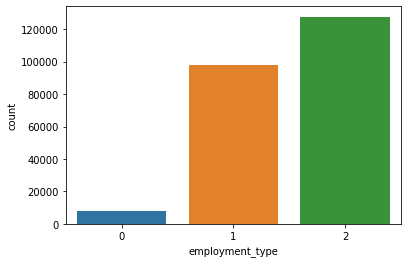

array([1, 2, 0])

In [12]:
sns.countplot(x='employment_type',data=df)
plt.show()
df['employment_type'].unique()

In [13]:
df['employment_type'].value_counts()

2    127635
1     97858
0      7661
Name: employment_type, dtype: int64

In [14]:
df['average_acct_age'].head(5)

0     0yrs 0mon
1    1yrs 11mon
2     0yrs 0mon
3     0yrs 8mon
4     0yrs 0mon
Name: average_acct_age, dtype: object

In [15]:
df[['average_acct_age_Year','average_acct_age_Month']] = df.average_acct_age.str.split(expand=True)
ds[['average_acct_age_Year','average_acct_age_Month']] = ds.average_acct_age.str.split(expand=True)

In [16]:
df[['average_acct_age' ,'average_acct_age_Year','average_acct_age_Month']].head()

,average_acct_age,average_acct_age_Year,average_acct_age_Month
0,0yrs 0mon,0yrs,0mon
1,1yrs 11mon,1yrs,11mon
2,0yrs 0mon,0yrs,0mon
3,0yrs 8mon,0yrs,8mon
4,0yrs 0mon,0yrs,0mon


In [17]:
ds[['average_acct_age' ,'average_acct_age_Year','average_acct_age_Month']].head()

,average_acct_age,average_acct_age_Year,average_acct_age_Month
0,0yrs 0mon,0yrs,0mon
1,0yrs 8mon,0yrs,8mon
2,0yrs 0mon,0yrs,0mon
3,2yrs 5mon,2yrs,5mon
4,0yrs 0mon,0yrs,0mon


In [18]:
df['average_acct_age_Year'] = df['average_acct_age_Year'].str.extract('(\d+)').astype(int)
df['average_acct_age_Month'] = df['average_acct_age_Month'].str.extract('(\d+)').astype(int)

ds['average_acct_age_Year'] = ds['average_acct_age_Year'].str.extract('(\d+)').astype(int)
ds['average_acct_age_Month'] = ds['average_acct_age_Month'].str.extract('(\d+)').astype(int)

In [19]:
df[['average_acct_age' ,'average_acct_age_Year','average_acct_age_Month']].head()

,average_acct_age,average_acct_age_Year,average_acct_age_Month
0,0yrs 0mon,0,0
1,1yrs 11mon,1,11
2,0yrs 0mon,0,0
3,0yrs 8mon,0,8
4,0yrs 0mon,0,0


In [20]:
ds[['average_acct_age' ,'average_acct_age_Year','average_acct_age_Month']].head()

,average_acct_age,average_acct_age_Year,average_acct_age_Month
0,0yrs 0mon,0,0
1,0yrs 8mon,0,8
2,0yrs 0mon,0,0
3,2yrs 5mon,2,5
4,0yrs 0mon,0,0


In [21]:
df['average_acct_age_Month1'] = df['average_acct_age_Year']*12
ds['average_acct_age_Month1'] = ds['average_acct_age_Year']*12

In [22]:
df['average_acct_age_Month'] = df['average_acct_age_Month1']+df['average_acct_age_Month']
ds['average_acct_age_Month'] = ds['average_acct_age_Month1']+ds['average_acct_age_Month']

In [23]:
df[['average_acct_age' ,'average_acct_age_Month']].head(5)

,average_acct_age,average_acct_age_Month
0,0yrs 0mon,0
1,1yrs 11mon,23
2,0yrs 0mon,0
3,0yrs 8mon,8
4,0yrs 0mon,0


In [24]:
df = df.drop(columns=['average_acct_age_Month1','average_acct_age' , 'average_acct_age_Year','average_acct_age'])
ds = ds.drop(columns=['average_acct_age_Month1','average_acct_age' , 'average_acct_age_Year','average_acct_age'])

In [25]:
df['credit_history_length'].head(5)

0     0yrs 0mon
1    1yrs 11mon
2     0yrs 0mon
3     1yrs 3mon
4     0yrs 0mon
Name: credit_history_length, dtype: object

In [26]:
ds['credit_history_length'].head(5)

0    0yrs 0mon
1    1yrs 0mon
2    0yrs 0mon
3    2yrs 5mon
4    0yrs 0mon
Name: credit_history_length, dtype: object

In [27]:
df[['credit_history_length_Year','credit_history_length_Month']] = df.credit_history_length.str.split(expand=True)
ds[['credit_history_length_Year','credit_history_length_Month']] = ds.credit_history_length.str.split(expand=True)

In [28]:
df[['credit_history_length' ,'credit_history_length_Year','credit_history_length_Month']].head()

,credit_history_length,credit_history_length_Year,credit_history_length_Month
0,0yrs 0mon,0yrs,0mon
1,1yrs 11mon,1yrs,11mon
2,0yrs 0mon,0yrs,0mon
3,1yrs 3mon,1yrs,3mon
4,0yrs 0mon,0yrs,0mon


In [29]:
ds[['credit_history_length' ,'credit_history_length_Year','credit_history_length_Month']].head()

,credit_history_length,credit_history_length_Year,credit_history_length_Month
0,0yrs 0mon,0yrs,0mon
1,1yrs 0mon,1yrs,0mon
2,0yrs 0mon,0yrs,0mon
3,2yrs 5mon,2yrs,5mon
4,0yrs 0mon,0yrs,0mon


In [30]:
df[['credit_history_length' ,'credit_history_length_Year','credit_history_length_Month']].dtypes

credit_history_length          object
credit_history_length_Year     object
credit_history_length_Month    object
dtype: object

In [31]:
df['credit_history_length_Year'] = df['credit_history_length_Year'].str.extract('(\d+)').astype(int)
df['credit_history_length_Month'] = df['credit_history_length_Month'].str.extract('(\d+)').astype(int)

ds['credit_history_length_Year'] = ds['credit_history_length_Year'].str.extract('(\d+)').astype(int)
ds['credit_history_length_Month'] = ds['credit_history_length_Month'].str.extract('(\d+)').astype(int)

In [32]:
df[['credit_history_length' ,'credit_history_length_Year','credit_history_length_Month']].head()

,credit_history_length,credit_history_length_Year,credit_history_length_Month
0,0yrs 0mon,0,0
1,1yrs 11mon,1,11
2,0yrs 0mon,0,0
3,1yrs 3mon,1,3
4,0yrs 0mon,0,0


In [33]:
ds[['credit_history_length' ,'credit_history_length_Year','credit_history_length_Month']].head()

,credit_history_length,credit_history_length_Year,credit_history_length_Month
0,0yrs 0mon,0,0
1,1yrs 0mon,1,0
2,0yrs 0mon,0,0
3,2yrs 5mon,2,5
4,0yrs 0mon,0,0


In [34]:
df['credit_history_length_Month1'] = df['credit_history_length_Year']*12
ds['credit_history_length_Month1'] = ds['credit_history_length_Year']*12

In [35]:
df[['credit_history_length_Year' ,'credit_history_length_Month1','credit_history_length_Month']].head(5)

,credit_history_length_Year,credit_history_length_Month1,credit_history_length_Month
0,0,0,0
1,1,12,11
2,0,0,0
3,1,12,3
4,0,0,0


In [36]:
ds[['credit_history_length_Year' ,'credit_history_length_Month1','credit_history_length_Month']].head(5)

,credit_history_length_Year,credit_history_length_Month1,credit_history_length_Month
0,0,0,0
1,1,12,0
2,0,0,0
3,2,24,5
4,0,0,0


In [37]:
df['credit_history_length_Month'] = df['credit_history_length_Month1']+df['credit_history_length_Month']
ds['credit_history_length_Month'] = ds['credit_history_length_Month1']+ds['credit_history_length_Month']

In [38]:
df[['credit_history_length' ,'credit_history_length_Month']].head(5)

,credit_history_length,credit_history_length_Month
0,0yrs 0mon,0
1,1yrs 11mon,23
2,0yrs 0mon,0
3,1yrs 3mon,15
4,0yrs 0mon,0


In [39]:
ds[['credit_history_length' ,'credit_history_length_Month']].head(5)

,credit_history_length,credit_history_length_Month
0,0yrs 0mon,0
1,1yrs 0mon,12
2,0yrs 0mon,0
3,2yrs 5mon,29
4,0yrs 0mon,0


In [40]:
df = df.drop(columns=['credit_history_length_Month1','credit_history_length' , 'credit_history_length_Year'])
ds = ds.drop(columns=['credit_history_length_Month1','credit_history_length' , 'credit_history_length_Year'])

In [41]:
from datetime import date 
from datetime import datetime as dt
from datetime import timedelta

In [42]:
df[['date_of_birth' , 'disbursaldate']].dtypes

date_of_birth    object
disbursaldate    object
dtype: object

In [43]:
df[['date_of_birth' , 'disbursaldate']].head(5)

,date_of_birth,disbursaldate
0,01-01-84,03-08-18
1,31-07-85,26-09-18
2,24-08-85,01-08-18
3,30-12-93,26-10-18
4,09-12-77,26-09-18


In [44]:
df["date_of_birth"]= pd.to_datetime(df["date_of_birth"])
df["disbursaldate"]= pd.to_datetime(df["disbursaldate"])

ds["date_of_birth"]= pd.to_datetime(df["date_of_birth"])
ds["disbursaldate"]= pd.to_datetime(df["disbursaldate"])

In [45]:
df[['date_of_birth','disbursaldate']].dtypes

date_of_birth    datetime64[ns]
disbursaldate    datetime64[ns]
dtype: object

In [46]:
df[['date_of_birth' , 'disbursaldate']].head(5)

,date_of_birth,disbursaldate
0,1984-01-01,2018-03-08
1,1985-07-31,2018-09-26
2,1985-08-24,2018-01-08
3,1993-12-30,2018-10-26
4,1977-09-12,2018-09-26


In [47]:
df['date_of_birth_Year'] = pd.DatetimeIndex(df['date_of_birth']).year
df['disbursaldate_Year'] = pd.DatetimeIndex(df['disbursaldate']).year

ds['date_of_birth_Year'] = pd.DatetimeIndex(ds['date_of_birth']).year
ds['disbursaldate_Year'] = pd.DatetimeIndex(ds['disbursaldate']).year

Text(0.5, 1.0, 'Distribution of Year of birth')

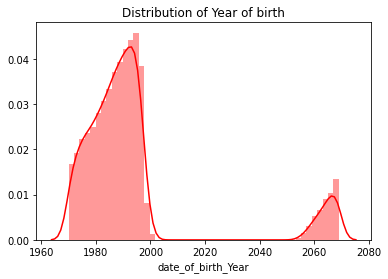

In [48]:
sns.distplot(df['date_of_birth_Year'], color = 'red')
plt.title('Distribution of Year of birth')

In [49]:
df.loc[(df['date_of_birth_Year'] > 2018) , 'date_of_birth_Year'] -= 100
ds.loc[(ds['date_of_birth_Year'] > 2018) , 'date_of_birth_Year'] -= 100

Text(0.5, 1.0, 'Distribution of Year of birth')

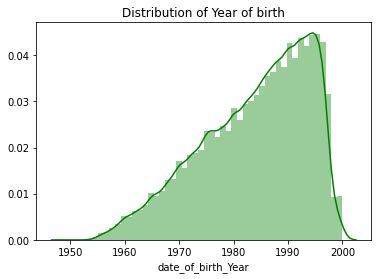

In [50]:
sns.distplot(df['date_of_birth_Year'], color = 'green')
plt.title('Distribution of Year of birth')

In [51]:
df['Client_Age'] = df['disbursaldate_Year'] - df['date_of_birth_Year']
ds['Client_Age'] = ds['disbursaldate_Year'] - ds['date_of_birth_Year']

In [52]:
df['Client_Age'] = df['Client_Age'].astype(int)
ds['Client_Age'] = ds['Client_Age'].astype(int)

In [53]:
df = df.drop(columns=['disbursaldate_Year','date_of_birth_Year' ])
ds = ds.drop(columns=['disbursaldate_Year','date_of_birth_Year' ])

In [54]:
df = df.drop(columns=['date_of_birth','disbursaldate' ])
ds = ds.drop(columns=['date_of_birth','disbursaldate' ])

## Target Column

<AxesSubplot:xlabel='loan_default', ylabel='count'>

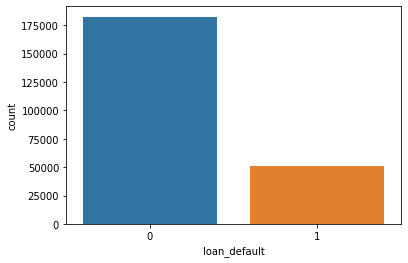

In [55]:
df['loan_default'].value_counts()
df['loan_default'].value_counts(normalize=True)

sns.countplot(df['loan_default'])

# Label Encoding

In [56]:
df[['perform_cns_score_description' , 'employment_type']].head()

,perform_cns_score_description,employment_type
0,No Bureau History Available,1
1,I-Medium Risk,2
2,No Bureau History Available,2
3,L-Very High Risk,2
4,No Bureau History Available,2


In [57]:
import pandas
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [58]:
df[['perform_cns_score_description' , 'employment_type']] = df[['perform_cns_score_description' , 'employment_type']].apply(LabelEncoder().fit_transform)

In [59]:
ds[['perform_cns_score_description' , 'employment_type']] = ds[['perform_cns_score_description' , 'employment_type']].apply(LabelEncoder().fit_transform)

In [60]:
df[['perform_cns_score_description' , 'employment_type']].head()

,perform_cns_score_description,employment_type
0,13,1
1,8,2
2,13,2
3,11,2
4,13,2


In [61]:
df['branch_id'] = df['branch_id'].astype('category')
df['manufacturer_id'] = df['manufacturer_id'].astype('category')
df['state_id'] = df['state_id'].astype('category')


ds['branch_id'] = ds['branch_id'].astype('category')
ds['manufacturer_id'] = ds['manufacturer_id'].astype('category')
ds['state_id'] = ds['state_id'].astype('category')

In [62]:
df[['branch_id' , 'manufacturer_id' , 'state_id']] = df[['branch_id' , 'manufacturer_id' , 'state_id']].apply(LabelEncoder().fit_transform)
ds[['branch_id' , 'manufacturer_id' , 'state_id']] = ds[['branch_id' , 'manufacturer_id' , 'state_id']].apply(LabelEncoder().fit_transform)

In [63]:
df = df.drop(['branch_id' , 'manufacturer_id' , 'state_id'] , axis=1)
ds = ds.drop(['branch_id' , 'manufacturer_id' , 'state_id'] , axis=1)

##### Normalize Full Dataframe except the foucus column

In [64]:
#This Function is not working good !

In [65]:
def normalize(df):
    df_norm=((df-df.min())/(df.max()-df.min()))*20
    df_norm["loan_default"]=df["loan_default"]
    return df_norm

In [66]:
cols_to_norm = ['disbursed_amount' , 'ltv' , 'asset_cost']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
ds[cols_to_norm] = ds[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

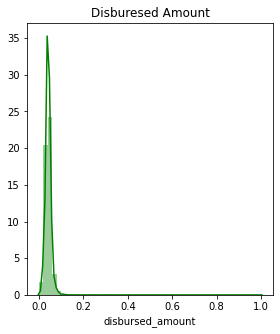

In [67]:
plt.rcParams['figure.figsize'] = (15, 5)

plt.subplot(1, 3, 1)
sns.distplot(df['disbursed_amount'],  color = 'green')
plt.title('Disburesed Amount')
plt.show()

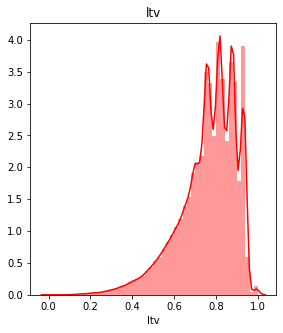

In [68]:
plt.rcParams['figure.figsize'] = (15, 5)

plt.subplot(1, 3, 3)
sns.distplot(df['ltv'],  color = 'red')
plt.title('ltv')
plt.show()

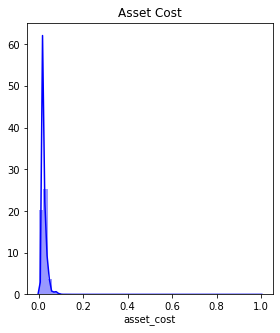

In [69]:
plt.rcParams['figure.figsize'] = (15, 5)

plt.subplot(1, 3, 1)
sns.distplot(df['asset_cost'],  color = 'blue')
plt.title('Asset Cost')
plt.show()

1    195924
0     37230
Name: aadhar_flag, dtype: int64

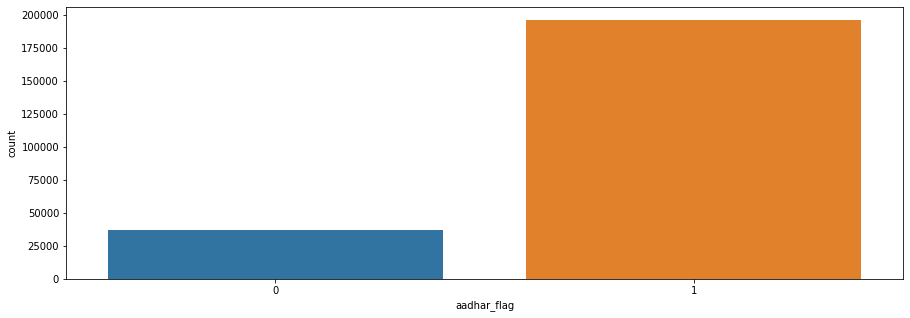

In [70]:
sns.countplot(x="aadhar_flag", data=df)
df['aadhar_flag'].value_counts()

1    233154
Name: mobileno_avl_flag, dtype: int64

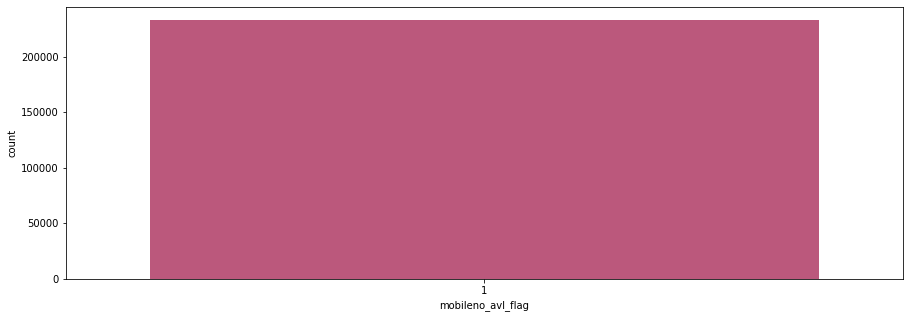

In [71]:
sns.countplot(x="mobileno_avl_flag", data=df,palette='plasma')
df['mobileno_avl_flag'].value_counts()

0    215533
1     17621
Name: pan_flag, dtype: int64

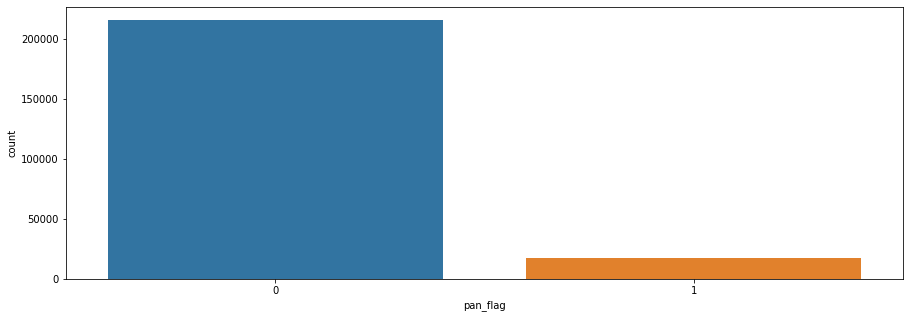

In [72]:
sns.countplot(x="pan_flag", data=df)
df['pan_flag'].value_counts()

0    199360
1     33794
Name: voterid_flag, dtype: int64

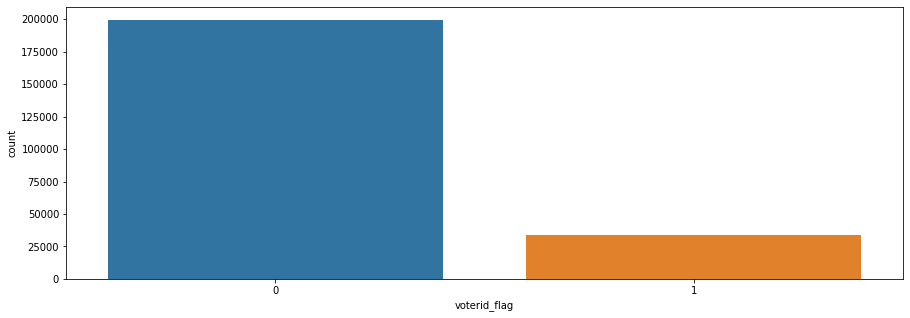

In [73]:
sns.countplot(x="voterid_flag", data=df)
df['voterid_flag'].value_counts()

0    227735
1      5419
Name: driving_flag, dtype: int64

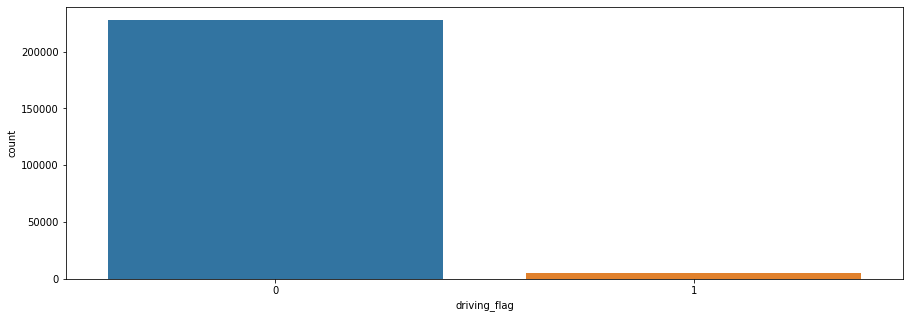

In [74]:
sns.countplot(x="driving_flag", data=df)
df['driving_flag'].value_counts()

0    232658
1       496
Name: passport_flag, dtype: int64

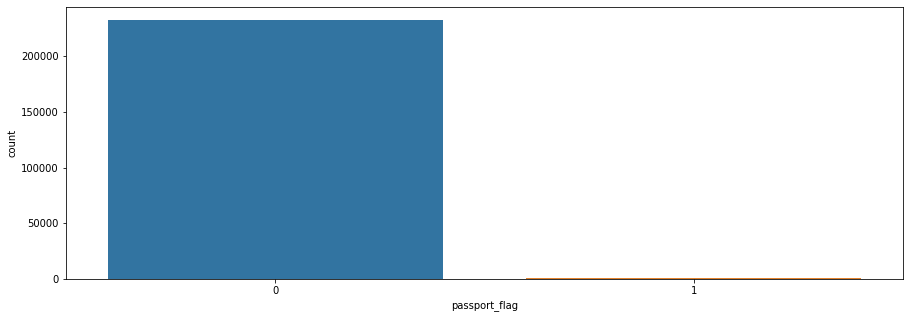

In [75]:
sns.countplot(x="passport_flag", data=df)
df['passport_flag'].value_counts()

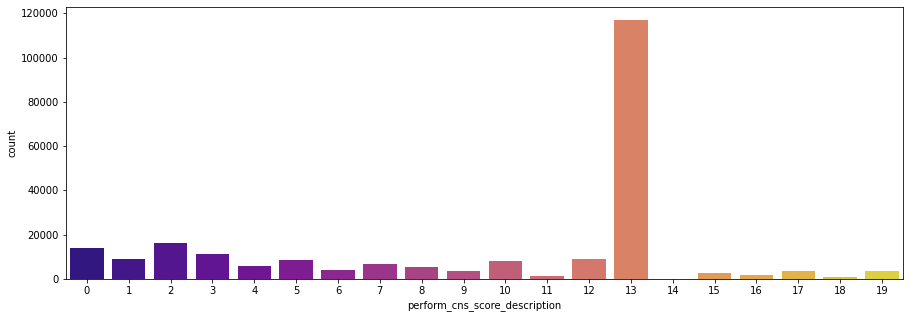

In [76]:
sns.countplot(x='perform_cns_score_description',data=df,palette='plasma' )
plt.show()

In [77]:
df['perform_cns_score_description'].value_counts()

13    116950
2      16045
0      14124
3      11358
1       9201
12      8776
5       8485
10      8277
7       6855
4       5821
8       5557
6       3988
19      3765
9       3748
17      3672
15      2885
16      1534
11      1134
18       976
14         3
Name: perform_cns_score_description, dtype: int64

In [78]:
## If i want to replace more than one value in column
#df.replace({'perform_cns_score_description' : { 'Medium' : 2, 'Small' : 1, 'High' : 3 }})

In [79]:
df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'supplier_id',
       'current_pincode_id', 'employment_type', 'employee_code_id',
       'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag',
       'driving_flag', 'passport_flag', 'perform_cns_score',
       'perform_cns_score_description', 'pri_no_of_accts', 'pri_active_accts',
       'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount',
       'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts',
       'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount',
       'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'no_of_inquiries', 'loan_default', 'average_acct_age_Month',
       'credit_history_length_Month', 'Client_Age'],
      dtype='object')

Text(0.5, 1.0, 'Before Normalization')

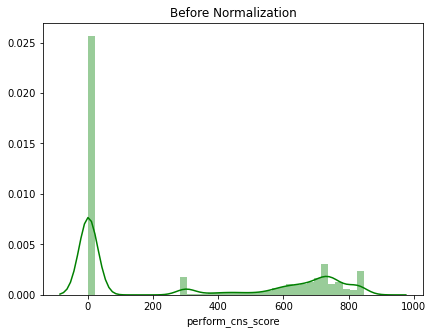

In [80]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.distplot(df['perform_cns_score'], color = 'green')
plt.title('Before Normalization')

In [81]:
cols = ['perform_cns_score']
df[cols] = df[cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
ds[cols] = ds[cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

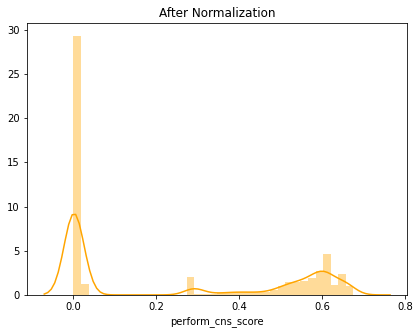

In [82]:
plt.subplot(1, 2, 2)
df['perform_cns_score'] = np.log1p(df['perform_cns_score'])
sns.distplot(df['perform_cns_score'], color = 'orange')
plt.title('After Normalization')
plt.show()

In [83]:
def round_int(x):
    if x == float("inf") or x == float("-inf"):
        return float('nan') # or x or return whatever makes sense
    return int(round(x))

In [86]:
df['pri_no_of_accts'] = np.log1p(df['pri_no_of_accts'])
df['pri_active_accts'] = np.log1p(df['pri_active_accts'])
df['pri_overdue_accts'] = np.log1p(df['pri_overdue_accts'])
df['pri_current_balance'] = np.log1p(df['pri_current_balance'])
#df['pri_sanctioned_amount'] = np.log1p(df['pri_sanctioned_amount'])
#df['pri_disbursed_amount'] = np.log1p(df['pri_disbursed_amount'])


#filling  missing values in sec.current.balance
df['pri_current_balance'].fillna(df['pri_current_balance'].mean(), inplace = True)
df['pri_sanctioned_amount'].fillna(df['pri_sanctioned_amount'].mean(), inplace = True)

#for test
ds['pri_no_of_accts'] = np.log1p(ds['pri_no_of_accts'])
ds['pri_active_accts'] = np.log1p(ds['pri_active_accts'])
ds['pri_overdue_accts'] = np.log1p(ds['pri_overdue_accts'])
ds['pri_current_balance'] = np.log1p(ds['pri_current_balance'])
#ds['pri_sanctioned_amount'] = np.log1p(ds['pri_sanctioned_amount'])
#ds['pri_disbursed_amount'] = np.log1p(ds['pri_disbursed_amount'])


#  filling  missing values in sec.current.balance
ds['pri_current_balance'].fillna(ds['pri_current_balance'].mean(), inplace = True)
ds['pri_sanctioned_amount'].fillna(ds['pri_sanctioned_amount'].mean(), inplace = True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


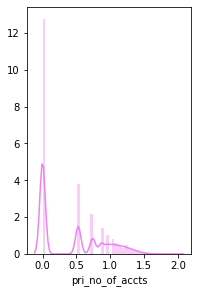

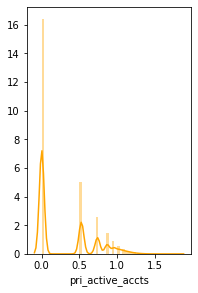

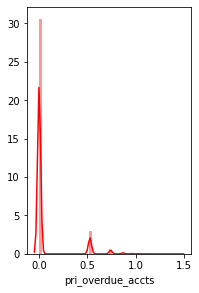

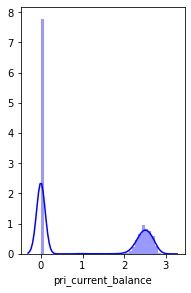

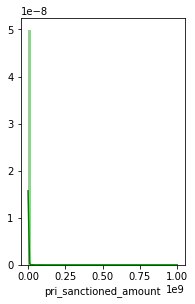

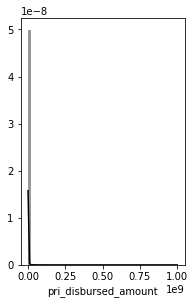

In [87]:
plt.rcParams['figure.figsize'] = (10, 10)    
plt.subplot(2, 3, 1)
sns.distplot(df['pri_no_of_accts'], color = 'violet')
plt.show()

plt.subplot(2, 3, 1)
sns.distplot(df['pri_active_accts'], color = 'orange')
plt.show()

plt.subplot(2, 3, 1)
sns.distplot(df['pri_overdue_accts'], color = 'red')
plt.show()

plt.subplot(2, 3, 1)
sns.distplot(df['pri_current_balance'], color = 'blue')
plt.show()

plt.subplot(2, 3, 1)
sns.distplot(df['pri_sanctioned_amount'], color = 'green')
plt.show()


plt.subplot(2, 3, 1)
sns.distplot(df['pri_disbursed_amount'], color = 'black')

plt.show()

In [90]:
df['sec_no_of_accts'] = np.log1p(df['sec_no_of_accts'])
df['sec_active_accts'] = np.log1p(df['sec_active_accts'])
df['sec_overdue_accts'] = np.log1p(df['sec_overdue_accts'])
df['sec_current_balance'] = np.log1p(df['sec_current_balance'])
#df['sec_sanctioned_amount'] = np.log1p(df['sec_sanctioned_amount'])
#df['sec_disbursed_amount'] = np.log1p(df['sec_disbursed_amount'])


#filling  missing values in sec.current.balance
df['sec_current_balance'].fillna(df['sec_current_balance'].mean(), inplace = True)
df['sec_sanctioned_amount'].fillna(df['sec_sanctioned_amount'].mean(), inplace = True)

#for test
ds['sec_no_of_accts'] = np.log1p(ds['sec_no_of_accts'])
ds['sec_active_accts'] = np.log1p(ds['sec_active_accts'])
ds['sec_overdue_accts'] = np.log1p(ds['sec_overdue_accts'])
ds['sec_current_balance'] = np.log1p(ds['sec_current_balance'])
#ds['sec_sanctioned_amount'] = np.log1p(ds['sec_sanctioned_amount'])
#ds['sec_disbursed_amount'] = np.log1p(ds['sec_disbursed_amount'])


#  filling  missing values in sec.current.balance
ds['sec_current_balance'].fillna(ds['sec_current_balance'].mean(), inplace = True)
ds['sec_sanctioned_amount'].fillna(ds['sec_sanctioned_amount'].mean(), inplace = True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


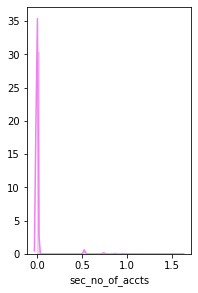

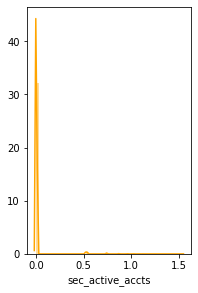

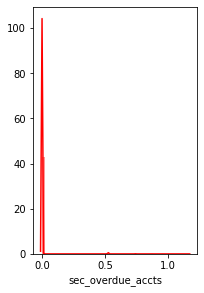

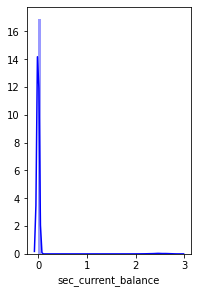

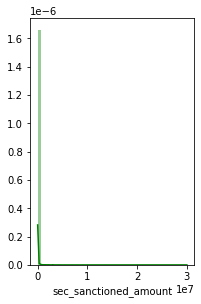

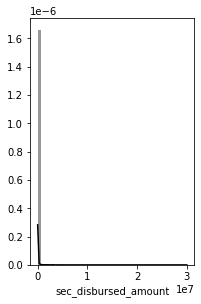

In [91]:
plt.rcParams['figure.figsize'] = (10, 10)    
plt.subplot(2, 3, 1)
sns.distplot(df['sec_no_of_accts'], color = 'violet')
plt.show()

plt.subplot(2, 3, 1)
sns.distplot(df['sec_active_accts'], color = 'orange')
plt.show()

plt.subplot(2, 3, 1)
sns.distplot(df['sec_overdue_accts'], color = 'red')
plt.show()

plt.subplot(2, 3, 1)
sns.distplot(df['sec_current_balance'], color = 'blue')
plt.show()

plt.subplot(2, 3, 1)
sns.distplot(df['sec_sanctioned_amount'], color = 'green')
plt.show()


plt.subplot(2, 3, 1)
sns.distplot(df['sec_disbursed_amount'], color = 'black')

plt.show()

Text(0.5, 1.0, 'Primary Installment Amount')

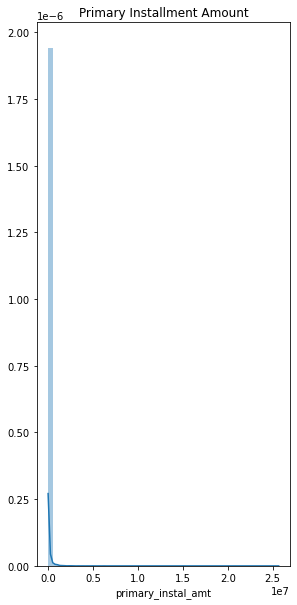

In [93]:
plt.subplot(1, 2, 1)
sns.distplot(df['primary_instal_amt'])
plt.title('Primary Installment Amount', fontsize = 12)

Text(0.5, 1.0, 'Primary Installment Amount')

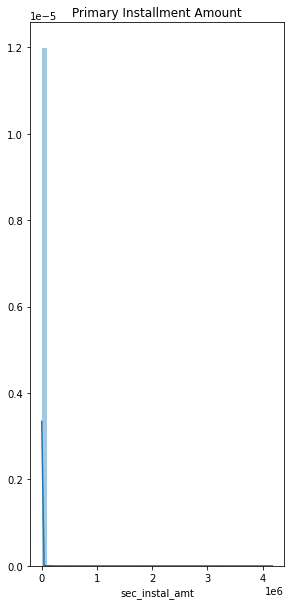

In [94]:
plt.subplot(1, 2, 1)
sns.distplot(df['sec_instal_amt'])
plt.title('Primary Installment Amount', fontsize = 12)

In [95]:
df['primary_instal_amt'] = np.log1p(df['primary_instal_amt'])
df['sec_instal_amt'] = np.log1p(df['sec_instal_amt'])

ds['primary_instal_amt'] = np.log1p(ds['primary_instal_amt'])
ds['sec_instal_amt'] = np.log1p(ds['sec_instal_amt'])

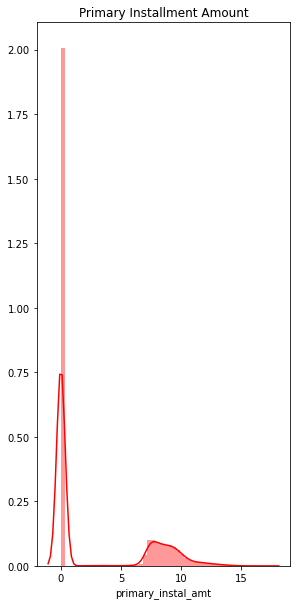

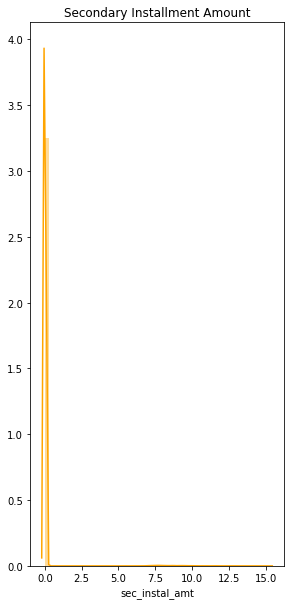

In [96]:
plt.subplot(1, 2, 1)
sns.distplot(df['primary_instal_amt'], color = 'red')
plt.title('Primary Installment Amount', fontsize = 12)
plt.show()


plt.subplot(1, 2, 1)
sns.distplot(df['sec_instal_amt'], color = 'orange')
plt.title('Secondary Installment Amount', fontsize = 12)
plt.show()

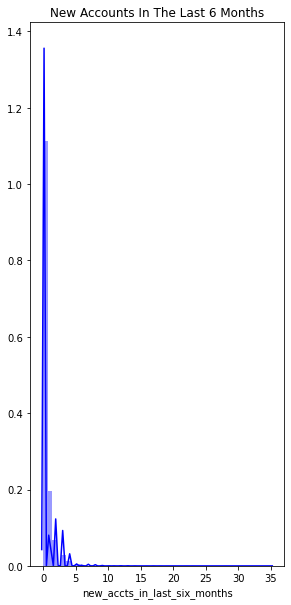

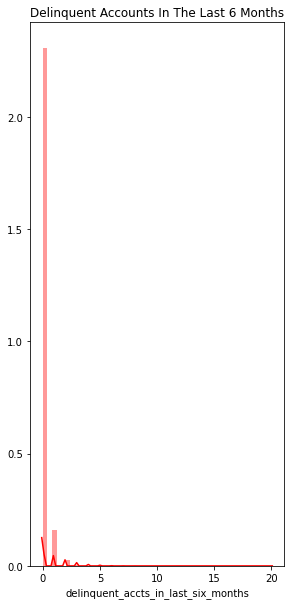

In [97]:
plt.subplot(1, 2, 1)
sns.distplot(df['new_accts_in_last_six_months'],color='blue')
plt.title('New Accounts In The Last 6 Months', fontsize = 12)
plt.show()


plt.subplot(1, 2, 1)
sns.distplot(df['delinquent_accts_in_last_six_months'] ,color='red')
plt.title('Delinquent Accounts In The Last 6 Months', fontsize = 12)
plt.show()

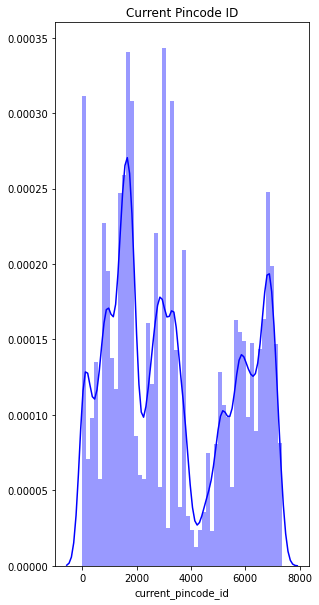

In [98]:
plt.subplot(1, 2, 1)
sns.distplot(df['current_pincode_id'],color='blue')
plt.title('Current Pincode ID', fontsize = 12)
plt.show()

In [99]:
df['current_pincode_id'] = np.log1p(df['current_pincode_id'])
ds['current_pincode_id'] = np.log1p(ds['current_pincode_id'])

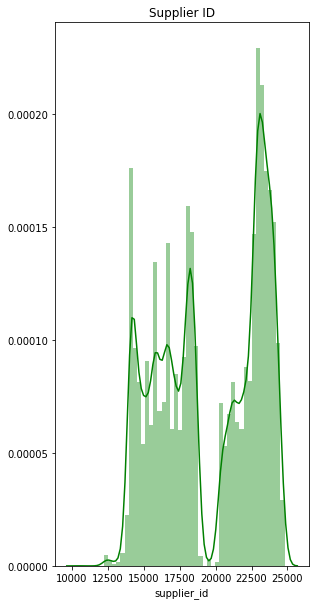

In [100]:
plt.subplot(1, 2, 1)
sns.distplot(df['supplier_id'],color='green')
plt.title('Supplier ID', fontsize = 12)
plt.show()

In [101]:
df['supplier_id'] = np.log1p(df['supplier_id'])
ds['supplier_id'] = np.log1p(ds['supplier_id'])

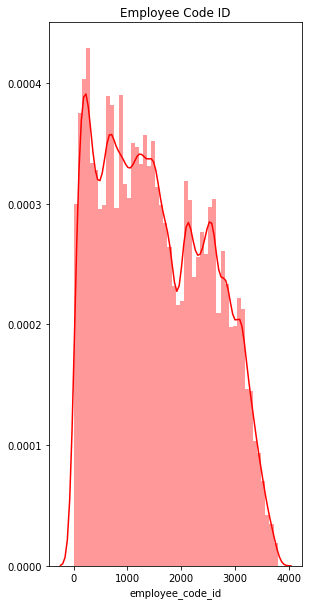

In [102]:
plt.subplot(1, 2, 1)
sns.distplot(df['employee_code_id'],color='red')
plt.title('Employee Code ID', fontsize = 12)
plt.show()

In [103]:
df['employee_code_id'] = np.log1p(df['employee_code_id'])
ds['employee_code_id'] = np.log1p(ds['employee_code_id'])

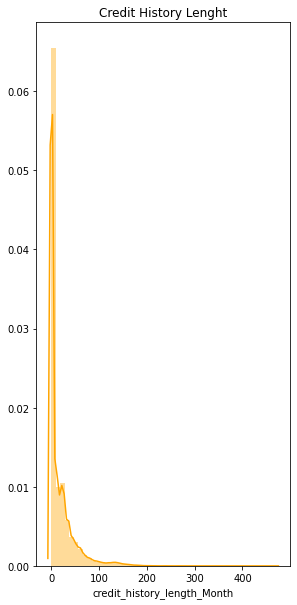

In [104]:
plt.subplot(1, 2, 1)
sns.distplot(df['credit_history_length_Month'],color='orange')
plt.title('Credit History Lenght', fontsize = 12)
plt.show()

In [105]:
df['credit_history_length_Month'].head()

0     0
1    23
2     0
3    15
4     0
Name: credit_history_length_Month, dtype: int64

In [106]:
df['credit_history_length_Month'].value_counts()

0      119127
6        4761
25       4745
7        4017
24       3833
        ...  
296         1
339         1
249         1
274         1
288         1
Name: credit_history_length_Month, Length: 294, dtype: int64

In [107]:
df['credit_history_length_Month'] = np.log1p(df['credit_history_length_Month'])
ds['credit_history_length_Month'] = np.log1p(ds['credit_history_length_Month'])

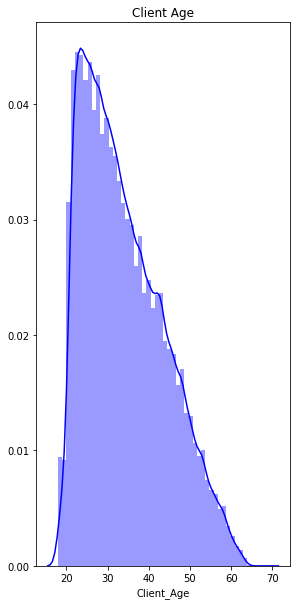

In [108]:
plt.subplot(1, 2, 1)
sns.distplot(df['Client_Age'],color='blue')
plt.title('Client Age', fontsize = 12)
plt.show()

In [109]:
df['Client_Age'] = np.log1p(df['Client_Age'])
ds['Client_Age'] = np.log1p(ds['Client_Age'])

In [110]:
df.to_csv('/Users/mariemashraf/Documents/Course/Test1.csv', index = False)

In [137]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

from sklearn import svm
import pandas as pd
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


#from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
from scipy.stats import poisson
from datetime import date 
from datetime import datetime as dt
from datetime import timedelta

from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score

In [138]:
X1 = df.drop(columns=['loan_default'] , axis=1 )
y1 = df['loan_default']

In [139]:
def calssify_bef(model , x,y):
    x1_train , x1_test ,y1_train , y1_test = train_test_split(X1,y1,test_size = 0.25 , random_state=42)
    model.fit(x1_train ,y1_train)
    y_pred = model.predict(x1_test)
    print("Accuarcy For Your Model" ,model.score( x1_test , y1_test )*100)
    score = cross_val_score(model,x,y,cv=5)
    print("Cross Validation For Your Model" , np.mean(score)*100)
    
    R2_regression = round(r2_score(y1_test, y_pred),4)
    print("R2 Regression For Your Model" , R2_regression)
    MAE_regression = int(mean_absolute_error(y1_test,y_pred))
    print("Mean Absolute Error For Your Model" , MAE_regression)
    
    print("Confusion Matrix" , confusion_matrix(y1_test,y_pred))
    print("F1 score" , f1_score(y1_test,y_pred))
    
    print('Accuracy:', accuracy_score(y1_test, y_pred))
    print('Recall:', recall_score(y1_test, y_pred))
    print('Precision:', precision_score(y1_test, y_pred))
    print('\n clasification report:\n', classification_report(y1_test,y_pred))
    print('\n confussion matrix:\n',confusion_matrix(y1_test, y_pred))
    pd.crosstab(y1_test,y_pred)
    
    #clf = SVC(random_state=0)
    #clf.fit(x1_train, y1_train)
    #SVC(random_state=0)
    #plot_confusion_matrix(x1_test, y1_test)
    #plt.show()
    
    ##scorez=r2_score(y_test,y_pred)
    ##print("Score For Your Model" , np.mean(scorez)*100)
    ##print(confusion_matrix(y_test,y_pred))
    ##print(classification_report(y_test,y_pred))

In [141]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote               = SMOTE()

In [142]:
def calssify_befSMOTE(model , x,y):
    x1_train , x1_test ,y1_train , y1_test = train_test_split(X1,y1,test_size = 0.25 , random_state=42)
    x1_train_smote , y1_train_smote = smote.fit_sample(x1_train, y1_train)
    model.fit(x1_train_smote ,y1_train_smote)
    y_pred = model.predict(x1_test)
    print("Accuarcy For Your Model" ,model.score( x1_test , y1_test )*100)
    score = cross_val_score(model,x,y,cv=5)
    print("Cross Validation For Your Model" , np.mean(score)*100)
    
    R2_regression = round(r2_score(y1_test, y_pred),4)
    print("R2 Regression For Your Model" , R2_regression)
    MAE_regression = int(mean_absolute_error(y1_test,y_pred))
    print("Mean Absolute Error For Your Model" , MAE_regression)
    
    print("Confusion Matrix" , confusion_matrix(y1_test,y_pred))
    print("F1 score" , f1_score(y1_test,y_pred))
    
    print('Accuracy:', accuracy_score(y1_test, y_pred))
    print('Recall:', recall_score(y1_test, y_pred))
    print('Precision:', precision_score(y1_test, y_pred))
    print('\n clasification report:\n', classification_report(y1_test,y_pred))
    print('\n confussion matrix:\n',confusion_matrix(y1_test, y_pred))
    pd.crosstab(y1_test,y_pred)
    
    
       
    #clf = SVC(random_state=0)
    #clf.fit(x1_train, y1_train)
    #SVC(random_state=0)
    #plot_confusion_matrix(x1_test, y1_test)
    #plt.show()
    
    ##scorez=r2_score(y_test,y_pred)
    ##print("Score For Your Model" , np.mean(scorez)*100)
    ##print(confusion_matrix(y_test,y_pred))
    ##print(classification_report(y_test,y_pred))

In [140]:
model = svm.LinearSVC(random_state=20)
calssify_bef(model,X1,y1)

Accuarcy For Your Model 71.88491825215736
Cross Validation For Your Model 69.27389165892312
R2 Regression For Your Model -0.6486
Mean Absolute Error For Your Model 0
Confusion Matrix [[38710  6866]
 [ 9522  3191]]
F1 score 0.28028107158541943
Accuracy: 0.7188491825215736
Recall: 0.25100291040667033
Precision: 0.3172914387988466

 clasification report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.83     45576
           1       0.32      0.25      0.28     12713

    accuracy                           0.72     58289
   macro avg       0.56      0.55      0.55     58289
weighted avg       0.70      0.72      0.71     58289


 confussion matrix:
 [[38710  6866]
 [ 9522  3191]]


In [143]:
model = svm.LinearSVC(random_state=20)
calssify_befSMOTE(model,X1,y1)

Accuarcy For Your Model 48.87714663143989
Cross Validation For Your Model 69.27389165892312
R2 Regression For Your Model -1.9978
Mean Absolute Error For Your Model 0
Confusion Matrix [[20158 25418]
 [ 4381  8332]]
F1 score 0.35865096958870496
Accuracy: 0.48877146631439894
Recall: 0.6553921183040982
Precision: 0.24687407407407408

 clasification report:
               precision    recall  f1-score   support

           0       0.82      0.44      0.57     45576
           1       0.25      0.66      0.36     12713

    accuracy                           0.49     58289
   macro avg       0.53      0.55      0.47     58289
weighted avg       0.70      0.49      0.53     58289


 confussion matrix:
 [[20158 25418]
 [ 4381  8332]]


In [144]:
model = DecisionTreeClassifier()
calssify_bef(model,X1,y1)

Accuarcy For Your Model 67.00063476813807
Cross Validation For Your Model 63.961986881064334
R2 Regression For Your Model -0.9351
Mean Absolute Error For Your Model 0
Confusion Matrix [[35417 10159]
 [ 9076  3637]]
F1 score 0.27439737447659285
Accuracy: 0.6700063476813807
Recall: 0.28608510973019746
Precision: 0.2636271383009568

 clasification report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79     45576
           1       0.26      0.29      0.27     12713

    accuracy                           0.67     58289
   macro avg       0.53      0.53      0.53     58289
weighted avg       0.68      0.67      0.67     58289


 confussion matrix:
 [[35417 10159]
 [ 9076  3637]]


In [145]:
model = DecisionTreeClassifier()
calssify_befSMOTE(model,X1,y1)

Accuarcy For Your Model 63.21604419358713
Cross Validation For Your Model 64.12111073973469
R2 Regression For Your Model -1.157
Mean Absolute Error For Your Model 0
Confusion Matrix [[32517 13059]
 [ 8382  4331]]
F1 score 0.28774540743447496
Accuracy: 0.6321604419358713
Recall: 0.3406748997089593
Precision: 0.24905117883841288

 clasification report:
               precision    recall  f1-score   support

           0       0.80      0.71      0.75     45576
           1       0.25      0.34      0.29     12713

    accuracy                           0.63     58289
   macro avg       0.52      0.53      0.52     58289
weighted avg       0.68      0.63      0.65     58289


 confussion matrix:
 [[32517 13059]
 [ 8382  4331]]


In [146]:
model = RandomForestClassifier()
calssify_bef(model,X1,y1)

Accuarcy For Your Model 77.96153648201204
Cross Validation For Your Model 76.67334506212838
R2 Regression For Your Model -0.2923
Mean Absolute Error For Your Model 0
Confusion Matrix [[44993   583]
 [12263   450]]
F1 score 0.06547359231776516
Accuracy: 0.7796153648201204
Recall: 0.0353968378824825
Precision: 0.4356243949661181

 clasification report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88     45576
           1       0.44      0.04      0.07     12713

    accuracy                           0.78     58289
   macro avg       0.61      0.51      0.47     58289
weighted avg       0.71      0.78      0.70     58289


 confussion matrix:
 [[44993   583]
 [12263   450]]


In [147]:
model = RandomForestClassifier()
calssify_befSMOTE(model,X1,y1)

Accuarcy For Your Model 72.28979738887269
Cross Validation For Your Model 76.69135883899158
R2 Regression For Your Model -0.6249
Mean Absolute Error For Your Model 0
Confusion Matrix [[39311  6265]
 [ 9887  2826]]
F1 score 0.2592184920198129
Accuracy: 0.7228979738887269
Recall: 0.2222921419019901
Precision: 0.3108568914310857

 clasification report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83     45576
           1       0.31      0.22      0.26     12713

    accuracy                           0.72     58289
   macro avg       0.55      0.54      0.54     58289
weighted avg       0.69      0.72      0.71     58289


 confussion matrix:
 [[39311  6265]
 [ 9887  2826]]


In [155]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

In [149]:
model = ExtraTreesClassifier()
calssify_bef(model,X1,y1)

Accuarcy For Your Model 77.73850983890614
Cross Validation For Your Model 77.48011971816473
R2 Regression For Your Model -0.3054
Mean Absolute Error For Your Model 0
Confusion Matrix [[44795   781]
 [12195   518]]
F1 score 0.0739366257493577
Accuracy: 0.7773850983890614
Recall: 0.0407456933847243
Precision: 0.3987682832948422

 clasification report:
               precision    recall  f1-score   support

           0       0.79      0.98      0.87     45576
           1       0.40      0.04      0.07     12713

    accuracy                           0.78     58289
   macro avg       0.59      0.51      0.47     58289
weighted avg       0.70      0.78      0.70     58289


 confussion matrix:
 [[44795   781]
 [12195   518]]


In [150]:
model = ExtraTreesClassifier()
calssify_befSMOTE(model,X1,y1)

Accuarcy For Your Model 72.43047573298564
Cross Validation For Your Model 77.44666533906887
R2 Regression For Your Model -0.6167
Mean Absolute Error For Your Model 0
Confusion Matrix [[39487  6089]
 [ 9981  2732]]
F1 score 0.25373827435683105
Accuracy: 0.7243047573298564
Recall: 0.21489813576653818
Precision: 0.30971545176283866

 clasification report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83     45576
           1       0.31      0.21      0.25     12713

    accuracy                           0.72     58289
   macro avg       0.55      0.54      0.54     58289
weighted avg       0.69      0.72      0.71     58289


 confussion matrix:
 [[39487  6089]
 [ 9981  2732]]


In [151]:
model = RandomForestClassifier(n_estimators=25 , max_depth=7 , min_samples_split=25 , max_features=1)
calssify_bef(model,X1,y1)

Accuarcy For Your Model 78.189709893805
Cross Validation For Your Model 78.29288796270488
R2 Regression For Your Model -0.2789
Mean Absolute Error For Your Model 0
Confusion Matrix [[45576     0]
 [12713     0]]
F1 score 0.0
Accuracy: 0.78189709893805
Recall: 0.0
Precision: 0.0

 clasification report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88     45576
           1       0.00      0.00      0.00     12713

    accuracy                           0.78     58289
   macro avg       0.39      0.50      0.44     58289
weighted avg       0.61      0.78      0.69     58289


 confussion matrix:
 [[45576     0]
 [12713     0]]


In [152]:
model = RandomForestClassifier(n_estimators=25 , max_depth=7 , min_samples_split=25 , max_features=1)
calssify_befSMOTE(model,X1,y1)

Accuarcy For Your Model 57.47053474926659
Cross Validation For Your Model 78.29288796270488
R2 Regression For Your Model -1.4939
Mean Absolute Error For Your Model 0
Confusion Matrix [[26458 19118]
 [ 5672  7041]]
F1 score 0.36226589833299033
Accuracy: 0.5747053474926659
Recall: 0.5538425234012428
Precision: 0.26916166520126916

 clasification report:
               precision    recall  f1-score   support

           0       0.82      0.58      0.68     45576
           1       0.27      0.55      0.36     12713

    accuracy                           0.57     58289
   macro avg       0.55      0.57      0.52     58289
weighted avg       0.70      0.57      0.61     58289


 confussion matrix:
 [[26458 19118]
 [ 5672  7041]]


In [153]:
model = RandomForestClassifier(n_estimators=100 , max_depth=7 , min_samples_split=25 , max_features=1)
calssify_bef(model,X1,y1)

Accuarcy For Your Model 78.189709893805
Cross Validation For Your Model 78.29288796270488
R2 Regression For Your Model -0.2789
Mean Absolute Error For Your Model 0
Confusion Matrix [[45576     0]
 [12713     0]]
F1 score 0.0
Accuracy: 0.78189709893805
Recall: 0.0
Precision: 0.0

 clasification report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88     45576
           1       0.00      0.00      0.00     12713

    accuracy                           0.78     58289
   macro avg       0.39      0.50      0.44     58289
weighted avg       0.61      0.78      0.69     58289


 confussion matrix:
 [[45576     0]
 [12713     0]]


In [154]:
model = RandomForestClassifier(n_estimators=100 , max_depth=7 , min_samples_split=25 , max_features=1)
calssify_befSMOTE(model,X1,y1)

Accuarcy For Your Model 56.8958122458783
Cross Validation For Your Model 78.29288796270488
R2 Regression For Your Model -1.5276
Mean Absolute Error For Your Model 0
Confusion Matrix [[25821 19755]
 [ 5370  7343]]
F1 score 0.36889301951721887
Accuracy: 0.568958122458783
Recall: 0.5775977346023755
Precision: 0.27097940807439663

 clasification report:
               precision    recall  f1-score   support

           0       0.83      0.57      0.67     45576
           1       0.27      0.58      0.37     12713

    accuracy                           0.57     58289
   macro avg       0.55      0.57      0.52     58289
weighted avg       0.71      0.57      0.61     58289


 confussion matrix:
 [[25821 19755]
 [ 5370  7343]]


# Feature Selection

#### Univariant Selection

In [156]:
X = df.drop(columns=['loan_default'] , axis=1 )
y = df['loan_default']

In [157]:
X.head()

,disbursed_amount,asset_cost,ltv,supplier_id,current_pincode_id,employment_type,employee_code_id,mobileno_avl_flag,aadhar_flag,pan_flag,...,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,no_of_inquiries,average_acct_age_Month,credit_history_length_Month,Client_Age
0,0.038125,0.013442,0.935860,10.034867,7.273786,1,7.600402,1,1,0,...,0,0,0.000000,0.0,0,0,0,0,0.000000,3.555348
1,0.034612,0.017934,0.743792,10.034867,7.315218,2,7.600402,1,1,0,...,0,0,7.596894,0.0,0,1,0,23,3.178054,3.526361
2,0.040888,0.015302,0.936801,10.034867,7.311886,2,7.600402,1,1,0,...,0,0,0.000000,0.0,0,0,0,0,0.000000,3.526361
3,0.045222,0.018287,0.923267,10.034867,7.314553,2,7.600402,1,1,0,...,0,0,3.465736,0.0,0,0,1,8,2.772589,3.258097
4,0.039967,0.014636,0.922208,10.034867,7.310550,2,7.600402,1,1,0,...,0,0,0.000000,0.0,0,0,1,0,0.000000,3.737670


In [158]:
X.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'supplier_id',
       'current_pincode_id', 'employment_type', 'employee_code_id',
       'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag',
       'driving_flag', 'passport_flag', 'perform_cns_score',
       'perform_cns_score_description', 'pri_no_of_accts', 'pri_active_accts',
       'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount',
       'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts',
       'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount',
       'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'no_of_inquiries', 'average_acct_age_Month',
       'credit_history_length_Month', 'Client_Age'],
      dtype='object')

In [159]:
X.isnull().sum()

disbursed_amount                       0
asset_cost                             0
ltv                                    0
supplier_id                            0
current_pincode_id                     0
employment_type                        0
employee_code_id                       0
mobileno_avl_flag                      0
aadhar_flag                            0
pan_flag                               0
voterid_flag                           0
driving_flag                           0
passport_flag                          0
perform_cns_score                      0
perform_cns_score_description          0
pri_no_of_accts                        0
pri_active_accts                       0
pri_overdue_accts                      0
pri_current_balance                    0
pri_sanctioned_amount                  0
pri_disbursed_amount                   0
sec_no_of_accts                        0
sec_active_accts                       0
sec_overdue_accts                      0
sec_current_bala

In [160]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: loan_default, dtype: int64

In [161]:
## Kbest to select the top K number features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [162]:
np.isnan(X.any())

disbursed_amount                       False
asset_cost                             False
ltv                                    False
supplier_id                            False
current_pincode_id                     False
employment_type                        False
employee_code_id                       False
mobileno_avl_flag                      False
aadhar_flag                            False
pan_flag                               False
voterid_flag                           False
driving_flag                           False
passport_flag                          False
perform_cns_score                      False
perform_cns_score_description          False
pri_no_of_accts                        False
pri_active_accts                       False
pri_overdue_accts                      False
pri_current_balance                    False
pri_sanctioned_amount                  False
pri_disbursed_amount                   False
sec_no_of_accts                        False
sec_active

In [163]:
X.dtypes

disbursed_amount                       float64
asset_cost                             float64
ltv                                    float64
supplier_id                            float64
current_pincode_id                     float64
employment_type                          int64
employee_code_id                       float64
mobileno_avl_flag                        int64
aadhar_flag                              int64
pan_flag                                 int64
voterid_flag                             int64
driving_flag                             int64
passport_flag                            int64
perform_cns_score                      float64
perform_cns_score_description            int64
pri_no_of_accts                        float64
pri_active_accts                       float64
pri_overdue_accts                      float64
pri_current_balance                    float64
pri_sanctioned_amount                    int64
pri_disbursed_amount                     int64
sec_no_of_acc

In [164]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [165]:
df = clean_dataset(df)

In [166]:
## Apply SelectBest Algorithm

order_applied_feature = SelectKBest(score_func=chi2 , k=35)
order_features = order_applied_feature.fit(X,y)

In [167]:
order_features

SelectKBest(k=35, score_func=<function chi2 at 0x7fda7af54430>)

In [168]:
order_features.scores_

array([5.90185467e+00, 2.75068424e-01, 5.36742737e+01, 6.23782826e-01,
       3.71277795e+01, 3.12790806e+01, 8.66479412e+00, 0.00000000e+00,
       6.44069100e+01, 9.02570591e-01, 3.81535253e+02, 7.71788310e+00,
       1.34465204e+01, 2.20479452e+02, 3.10883333e+03, 2.34854677e+02,
       1.54676902e+02, 3.13120965e+02, 2.87880305e+02, 7.69016357e+08,
       7.52248201e+08, 2.07603799e+01, 1.09401127e+01, 6.80422219e-01,
       3.99204789e+01, 4.32854080e+07, 4.22674616e+07, 1.59428847e+02,
       1.08369300e+02, 4.81455375e+02, 4.19806615e+02, 1.07454320e+03,
       3.66469748e+03, 7.46254652e+02, 7.30297706e+00])

In [169]:
df_scores = pd.DataFrame(order_features.scores_,columns=['Score'])
df_columns = pd.DataFrame(X.columns)

In [170]:
feature_Rank = pd.concat([df_columns , df_scores] , axis=1)

In [171]:
feature_Rank.columns=['Features' , 'Scores']

In [172]:
feature_Rank

,Features,Scores
0,disbursed_amount,5.901855e+00
1,asset_cost,2.750684e-01
2,ltv,5.367427e+01
3,supplier_id,6.237828e-01
4,current_pincode_id,3.712778e+01
5,employment_type,3.127908e+01
6,employee_code_id,8.664794e+00
7,mobileno_avl_flag,0.000000e+00
8,aadhar_flag,6.440691e+01
9,pan_flag,9.025706e-01


In [173]:
## to give me the top 10
feature_Rank.nlargest(10 , 'Scores')

,Features,Scores
19,pri_sanctioned_amount,7.690164e+08
20,pri_disbursed_amount,7.522482e+08
25,sec_sanctioned_amount,4.328541e+07
26,sec_disbursed_amount,4.226746e+07
32,average_acct_age_Month,3.664697e+03
14,perform_cns_score_description,3.108833e+03
31,no_of_inquiries,1.074543e+03
33,credit_history_length_Month,7.462547e+02
29,new_accts_in_last_six_months,4.814554e+02
30,delinquent_accts_in_last_six_months,4.198066e+02


In [174]:
## to give me the top 10
feature_Rank.nlargest(15 , 'Scores')

,Features,Scores
19,pri_sanctioned_amount,7.690164e+08
20,pri_disbursed_amount,7.522482e+08
25,sec_sanctioned_amount,4.328541e+07
26,sec_disbursed_amount,4.226746e+07
32,average_acct_age_Month,3.664697e+03
14,perform_cns_score_description,3.108833e+03
31,no_of_inquiries,1.074543e+03
33,credit_history_length_Month,7.462547e+02
29,new_accts_in_last_six_months,4.814554e+02
30,delinquent_accts_in_last_six_months,4.198066e+02


In [175]:
df_rank = df[['average_acct_age_Month' , 'perform_cns_score_description' , 'no_of_inquiries',
             'credit_history_length_Month' ,'new_accts_in_last_six_months' , 'delinquent_accts_in_last_six_months' ,
             'voterid_flag' , 'pri_sanctioned_amount' , 'pri_disbursed_amount' , 'pri_overdue_accts' , 'pri_current_balance',
             'pri_no_of_accts' , 'perform_cns_score' , 'primary_instal_amt' , 'pri_active_accts' , 'loan_default']]

In [176]:
X3 = df_rank.drop(columns=['loan_default'] , axis=1 )
y3 = df_rank['loan_default']

In [178]:

def calssify_bef_rank(model , x,y):
    x3_train , x3_test ,y3_train , y3_test = train_test_split(X3,y3,test_size = 0.25 , random_state=42)
    model.fit(x3_train ,y3_train)
    y_pred = model.predict(x3_test)
    print("Accuarcy For Your Model" ,model.score( x3_test , y3_test )*100)
    score = cross_val_score(model,x,y,cv=5)
    print("Cross Validation For Your Model" , np.mean(score)*100)
    
    R2_regression = round(r2_score(y3_test, y_pred),4)
    print("R2 Regression For Your Model" , R2_regression)
    MAE_regression = int(mean_absolute_error(y3_test,y_pred))
    print("Mean Absolute Error For Your Model" , MAE_regression)
    
    print("Confusion Matrix" , confusion_matrix(y3_test,y_pred))
    print("F1 score" , f1_score(y3_test,y_pred))
    
    print('Accuracy:', accuracy_score(y3_test, y_pred))
    print('Recall:', recall_score(y3_test, y_pred))
    print('Precision:', precision_score(y3_test, y_pred))
    print('\n clasification report:\n', classification_report(y3_test,y_pred))
    print('\n confussion matrix:\n',confusion_matrix(y3_test, y_pred))
    pd.crosstab(y3_test,y_pred)
    
    #scorez=r2_score(y_test,y_pred)
    #print("Score For Your Model" , np.mean(scorez)*100)
    #print(confusion_matrix(y_test,y_pred))
    #print(classification_report(y_test,y_pred))

In [179]:

def calssify_bef_rank_smote(model , x,y):
    x3_train , x3_test ,y3_train , y3_test = train_test_split(X3,y3,test_size = 0.25 , random_state=42)
    x3_train_smote , y3_train_smote = smote.fit_sample(x3_train, y3_train)
    model.fit(x3_train_smote ,y3_train_smote)
    y_pred = model.predict(x3_test)
    print("Accuarcy For Your Model" ,model.score( x3_test , y3_test )*100)
    score = cross_val_score(model,x,y,cv=5)
    print("Cross Validation For Your Model" , np.mean(score)*100)
    
    R2_regression = round(r2_score(y3_test, y_pred),4)
    print("R2 Regression For Your Model" , R2_regression)
    MAE_regression = int(mean_absolute_error(y3_test,y_pred))
    print("Mean Absolute Error For Your Model" , MAE_regression)
    
    print("Confusion Matrix" , confusion_matrix(y3_test,y_pred))
    print("F1 score" , f1_score(y3_test,y_pred))
    
    
    print('Accuracy:', accuracy_score(y3_test, y_pred))
    print('Recall:', recall_score(y3_test, y_pred))
    print('Precision:', precision_score(y3_test, y_pred))
    print('\n clasification report:\n', classification_report(y3_test,y_pred))
    print('\n confussion matrix:\n',confusion_matrix(y3_test, y_pred))
    pd.crosstab(y3_test,y_pred)
    
    #scorez=r2_score(y_test,y_pred)
    #print("Score For Your Model" , np.mean(scorez)*100)
    #print(confusion_matrix(y_test,y_pred))
    #print(classification_report(y_test,y_pred))

In [180]:
model = LogisticRegression()
calssify_bef_rank(model,X3,y3)

Accuarcy For Your Model 78.189709893805
Cross Validation For Your Model 78.28516777656262
R2 Regression For Your Model -0.2789
Mean Absolute Error For Your Model 0
Confusion Matrix [[45576     0]
 [12713     0]]
F1 score 0.0
Accuracy: 0.78189709893805
Recall: 0.0
Precision: 0.0

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     45576
         1.0       0.00      0.00      0.00     12713

    accuracy                           0.78     58289
   macro avg       0.39      0.50      0.44     58289
weighted avg       0.61      0.78      0.69     58289


 confussion matrix:
 [[45576     0]
 [12713     0]]


In [181]:
model = LogisticRegression()
calssify_bef_rank_smote(model,X3,y3)

Accuarcy For Your Model 50.46235138705416
Cross Validation For Your Model 78.28516777656262
R2 Regression For Your Model -1.9049
Mean Absolute Error For Your Model 0
Confusion Matrix [[22567 23009]
 [ 5866  6847]]
F1 score 0.3216894923535906
Accuracy: 0.5046235138705416
Recall: 0.538582553291906
Precision: 0.22933413719185422

 clasification report:
               precision    recall  f1-score   support

         0.0       0.79      0.50      0.61     45576
         1.0       0.23      0.54      0.32     12713

    accuracy                           0.50     58289
   macro avg       0.51      0.52      0.47     58289
weighted avg       0.67      0.50      0.55     58289


 confussion matrix:
 [[22567 23009]
 [ 5866  6847]]


In [182]:
model = svm.LinearSVC(random_state=20)
calssify_bef_rank(model,X3,y3)

Accuarcy For Your Model 78.03702242275557
Cross Validation For Your Model 73.70066385975744
R2 Regression For Your Model -0.2879
Mean Absolute Error For Your Model 0
Confusion Matrix [[45441   135]
 [12667    46]]
F1 score 0.007135101597642314
Accuracy: 0.7803702242275558
Recall: 0.0036183434279870997
Precision: 0.2541436464088398

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     45576
         1.0       0.25      0.00      0.01     12713

    accuracy                           0.78     58289
   macro avg       0.52      0.50      0.44     58289
weighted avg       0.67      0.78      0.69     58289


 confussion matrix:
 [[45441   135]
 [12667    46]]


In [183]:
model = svm.LinearSVC(random_state=20)
calssify_bef_rank_smote(model,X3,y3)

Accuarcy For Your Model 48.49457015903515
Cross Validation For Your Model 73.70066385975744
R2 Regression For Your Model -2.0202
Mean Absolute Error For Your Model 0
Confusion Matrix [[20783 24793]
 [ 5229  7484]]
F1 score 0.3326961547010447
Accuracy: 0.4849457015903515
Recall: 0.5886887438055534
Precision: 0.2318678935464882

 clasification report:
               precision    recall  f1-score   support

         0.0       0.80      0.46      0.58     45576
         1.0       0.23      0.59      0.33     12713

    accuracy                           0.48     58289
   macro avg       0.52      0.52      0.46     58289
weighted avg       0.68      0.48      0.53     58289


 confussion matrix:
 [[20783 24793]
 [ 5229  7484]]


In [184]:
model = DecisionTreeClassifier()
calssify_bef_rank(model,X3,y3)

Accuarcy For Your Model 72.85079517576214
Cross Validation For Your Model 72.93720017093607
R2 Regression For Your Model -0.592
Mean Absolute Error For Your Model 0
Confusion Matrix [[40985  4591]
 [11234  1479]]
F1 score 0.1574828302188149
Accuracy: 0.7285079517576215
Recall: 0.11633760717375914
Precision: 0.24365733113673804

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      0.90      0.84     45576
         1.0       0.24      0.12      0.16     12713

    accuracy                           0.73     58289
   macro avg       0.51      0.51      0.50     58289
weighted avg       0.67      0.73      0.69     58289


 confussion matrix:
 [[40985  4591]
 [11234  1479]]


In [187]:
model = DecisionTreeClassifier()
calssify_bef_rank_smote(model,X3,y3)

Accuarcy For Your Model 45.59693938822076
Cross Validation For Your Model 72.92862222312525
R2 Regression For Your Model -2.1902
Mean Absolute Error For Your Model 0
Confusion Matrix [[18268 27308]
 [ 4403  8310]]
F1 score 0.3438786700047588
Accuracy: 0.45596939388220764
Recall: 0.6536616062298435
Precision: 0.2333090010668763

 clasification report:
               precision    recall  f1-score   support

         0.0       0.81      0.40      0.54     45576
         1.0       0.23      0.65      0.34     12713

    accuracy                           0.46     58289
   macro avg       0.52      0.53      0.44     58289
weighted avg       0.68      0.46      0.49     58289


 confussion matrix:
 [[18268 27308]
 [ 4403  8310]]


In [188]:
model = RandomForestClassifier()
calssify_bef_rank(model,X3,y3)

Accuarcy For Your Model 77.40396987424728
Cross Validation For Your Model 77.55260489298415
R2 Regression For Your Model -0.325
Mean Absolute Error For Your Model 0
Confusion Matrix [[44737   839]
 [12332   381]]
F1 score 0.0546903035957798
Accuracy: 0.7740396987424728
Recall: 0.029969322740501847
Precision: 0.3122950819672131

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      0.98      0.87     45576
         1.0       0.31      0.03      0.05     12713

    accuracy                           0.77     58289
   macro avg       0.55      0.51      0.46     58289
weighted avg       0.68      0.77      0.69     58289


 confussion matrix:
 [[44737   839]
 [12332   381]]


In [189]:
model = RandomForestClassifier()
calssify_bef_rank_smote(model,X3,y3)

Accuarcy For Your Model 49.899638010602345
Cross Validation For Your Model 77.56461402543803
R2 Regression For Your Model -1.9379
Mean Absolute Error For Your Model 0
Confusion Matrix [[21791 23785]
 [ 5418  7295]]
F1 score 0.3331582673029936
Accuracy: 0.49899638010602343
Recall: 0.5738220718949107
Precision: 0.2347168597168597

 clasification report:
               precision    recall  f1-score   support

         0.0       0.80      0.48      0.60     45576
         1.0       0.23      0.57      0.33     12713

    accuracy                           0.50     58289
   macro avg       0.52      0.53      0.47     58289
weighted avg       0.68      0.50      0.54     58289


 confussion matrix:
 [[21791 23785]
 [ 5418  7295]]


In [190]:
model = ExtraTreesClassifier()
calssify_bef_rank(model,X3,y3)

Accuarcy For Your Model 76.89787095335312
Cross Validation For Your Model 77.0104740586031
R2 Regression For Your Model -0.3547
Mean Absolute Error For Your Model 0
Confusion Matrix [[44273  1303]
 [12163   550]]
F1 score 0.0755183303583688
Accuracy: 0.7689787095335312
Recall: 0.0432628018563675
Precision: 0.2968159740960604

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      0.97      0.87     45576
         1.0       0.30      0.04      0.08     12713

    accuracy                           0.77     58289
   macro avg       0.54      0.51      0.47     58289
weighted avg       0.68      0.77      0.70     58289


 confussion matrix:
 [[44273  1303]
 [12163   550]]


In [191]:
model = ExtraTreesClassifier()
calssify_bef_rank_smote(model,X3,y3)

Accuarcy For Your Model 49.35579611933641
Cross Validation For Your Model 77.01733619794115
R2 Regression For Your Model -1.9697
Mean Absolute Error For Your Model 0
Confusion Matrix [[21323 24253]
 [ 5267  7446]]
F1 score 0.3353147797892461
Accuracy: 0.4935579611933641
Recall: 0.585699677495477
Precision: 0.23489699990535978

 clasification report:
               precision    recall  f1-score   support

         0.0       0.80      0.47      0.59     45576
         1.0       0.23      0.59      0.34     12713

    accuracy                           0.49     58289
   macro avg       0.52      0.53      0.46     58289
weighted avg       0.68      0.49      0.54     58289


 confussion matrix:
 [[21323 24253]
 [ 5267  7446]]


In [192]:
model = RandomForestClassifier(n_estimators=25 , max_depth=7 , min_samples_split=25 , max_features=1)
calssify_bef_rank(model,X3,y3)

Accuarcy For Your Model 78.189709893805
Cross Validation For Your Model 78.29288796270488
R2 Regression For Your Model -0.2789
Mean Absolute Error For Your Model 0
Confusion Matrix [[45576     0]
 [12713     0]]
F1 score 0.0
Accuracy: 0.78189709893805
Recall: 0.0
Precision: 0.0

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     45576
         1.0       0.00      0.00      0.00     12713

    accuracy                           0.78     58289
   macro avg       0.39      0.50      0.44     58289
weighted avg       0.61      0.78      0.69     58289


 confussion matrix:
 [[45576     0]
 [12713     0]]


In [193]:
model = RandomForestClassifier(n_estimators=25 , max_depth=7 , min_samples_split=25 , max_features=1)
calssify_bef_rank_smote(model,X3,y3)

Accuarcy For Your Model 47.36742781656916
Cross Validation For Your Model 78.29288796270488
R2 Regression For Your Model -2.0863
Mean Absolute Error For Your Model 0
Confusion Matrix [[18985 26591]
 [ 4088  8625]]
F1 score 0.3599073629743997
Accuracy: 0.47367427816569163
Recall: 0.6784393927475812
Precision: 0.24491708314402544

 clasification report:
               precision    recall  f1-score   support

         0.0       0.82      0.42      0.55     45576
         1.0       0.24      0.68      0.36     12713

    accuracy                           0.47     58289
   macro avg       0.53      0.55      0.46     58289
weighted avg       0.70      0.47      0.51     58289


 confussion matrix:
 [[18985 26591]
 [ 4088  8625]]


In [194]:
model = RandomForestClassifier(n_estimators=100 , max_depth=7 , min_samples_split=25 , max_features=1)
calssify_bef_rank(model,X3,y3)

Accuarcy For Your Model 78.189709893805
Cross Validation For Your Model 78.29288796270488
R2 Regression For Your Model -0.2789
Mean Absolute Error For Your Model 0
Confusion Matrix [[45576     0]
 [12713     0]]
F1 score 0.0
Accuracy: 0.78189709893805
Recall: 0.0
Precision: 0.0

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     45576
         1.0       0.00      0.00      0.00     12713

    accuracy                           0.78     58289
   macro avg       0.39      0.50      0.44     58289
weighted avg       0.61      0.78      0.69     58289


 confussion matrix:
 [[45576     0]
 [12713     0]]


In [195]:
model = RandomForestClassifier(n_estimators=100 , max_depth=7 , min_samples_split=25 , max_features=1)
calssify_bef_rank_smote(model,X3,y3)

Accuarcy For Your Model 47.677949527355075
Cross Validation For Your Model 78.29288796270488
R2 Regression For Your Model -2.0681
Mean Absolute Error For Your Model 0
Confusion Matrix [[19270 26306]
 [ 4192  8521]]
F1 score 0.3584770719394194
Accuracy: 0.47677949527355074
Recall: 0.6702587902147408
Precision: 0.24466649438653917

 clasification report:
               precision    recall  f1-score   support

         0.0       0.82      0.42      0.56     45576
         1.0       0.24      0.67      0.36     12713

    accuracy                           0.48     58289
   macro avg       0.53      0.55      0.46     58289
weighted avg       0.70      0.48      0.51     58289


 confussion matrix:
 [[19270 26306]
 [ 4192  8521]]


#### Correlation

In [196]:
import seaborn as sns

In [197]:
df.corr()

,disbursed_amount,asset_cost,ltv,supplier_id,current_pincode_id,employment_type,employee_code_id,mobileno_avl_flag,aadhar_flag,pan_flag,...,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,no_of_inquiries,loan_default,average_acct_age_Month,credit_history_length_Month,Client_Age
disbursed_amount,1.000000,0.752668,0.376747,0.074989,0.114300,-0.041106,0.001685,NaN,-0.015589,0.014490,...,-0.005119,0.021686,-0.015057,0.035880,0.020198,0.038513,0.077675,0.004205,0.019314,-0.065268
asset_cost,0.752668,1.000000,-0.301188,0.143991,0.240625,0.015449,0.004076,NaN,-0.093716,0.048075,...,-0.010594,-0.052465,-0.022643,-0.021968,-0.007932,-0.017301,0.014261,-0.015614,-0.040990,-0.126993
ltv,0.376747,-0.301188,1.000000,-0.100337,-0.194657,-0.077431,0.000620,NaN,0.106953,-0.037786,...,0.008733,0.107575,0.012956,0.083824,0.041921,0.085725,0.098208,0.029853,0.088127,0.085056
supplier_id,0.074989,0.143991,-0.100337,1.000000,0.144352,0.076373,0.046418,NaN,-0.080625,0.035161,...,-0.010055,-0.076026,-0.024680,-0.053304,-0.024751,-0.030895,0.027921,-0.034626,-0.082642,-0.036091
current_pincode_id,0.114300,0.240625,-0.194657,0.144352,1.000000,0.060332,-0.036807,NaN,-0.215959,-0.079488,...,-0.033359,-0.111380,-0.069638,-0.084641,-0.050541,-0.060595,0.030445,-0.061086,-0.127703,-0.062029
employment_type,-0.041106,0.015449,-0.077431,0.076373,0.060332,1.000000,0.024877,NaN,-0.094274,0.021053,...,0.001179,-0.001512,-0.001410,0.005380,0.014894,0.010080,0.025377,0.019889,0.014126,0.194541
employee_code_id,0.001685,0.004076,0.000620,0.046418,-0.036807,0.024877,1.000000,NaN,0.021064,-0.004486,...,0.001813,0.003639,0.006794,0.006563,0.004084,-0.001656,0.016140,0.003265,0.004422,0.009312
mobileno_avl_flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aadhar_flag,-0.015589,-0.093716,0.106953,-0.080625,-0.215959,-0.094274,0.021064,NaN,1.000000,-0.202320,...,0.007540,0.056292,0.014843,0.059269,0.023823,0.027317,-0.041593,0.012217,0.059081,0.016144
pan_flag,0.014490,0.048075,-0.037786,0.035161,-0.079488,0.021053,-0.004486,NaN,-0.202320,1.000000,...,0.014907,0.001876,0.015972,0.007046,-0.002562,0.016657,0.002046,0.015093,0.008787,-0.010544


<AxesSubplot:>

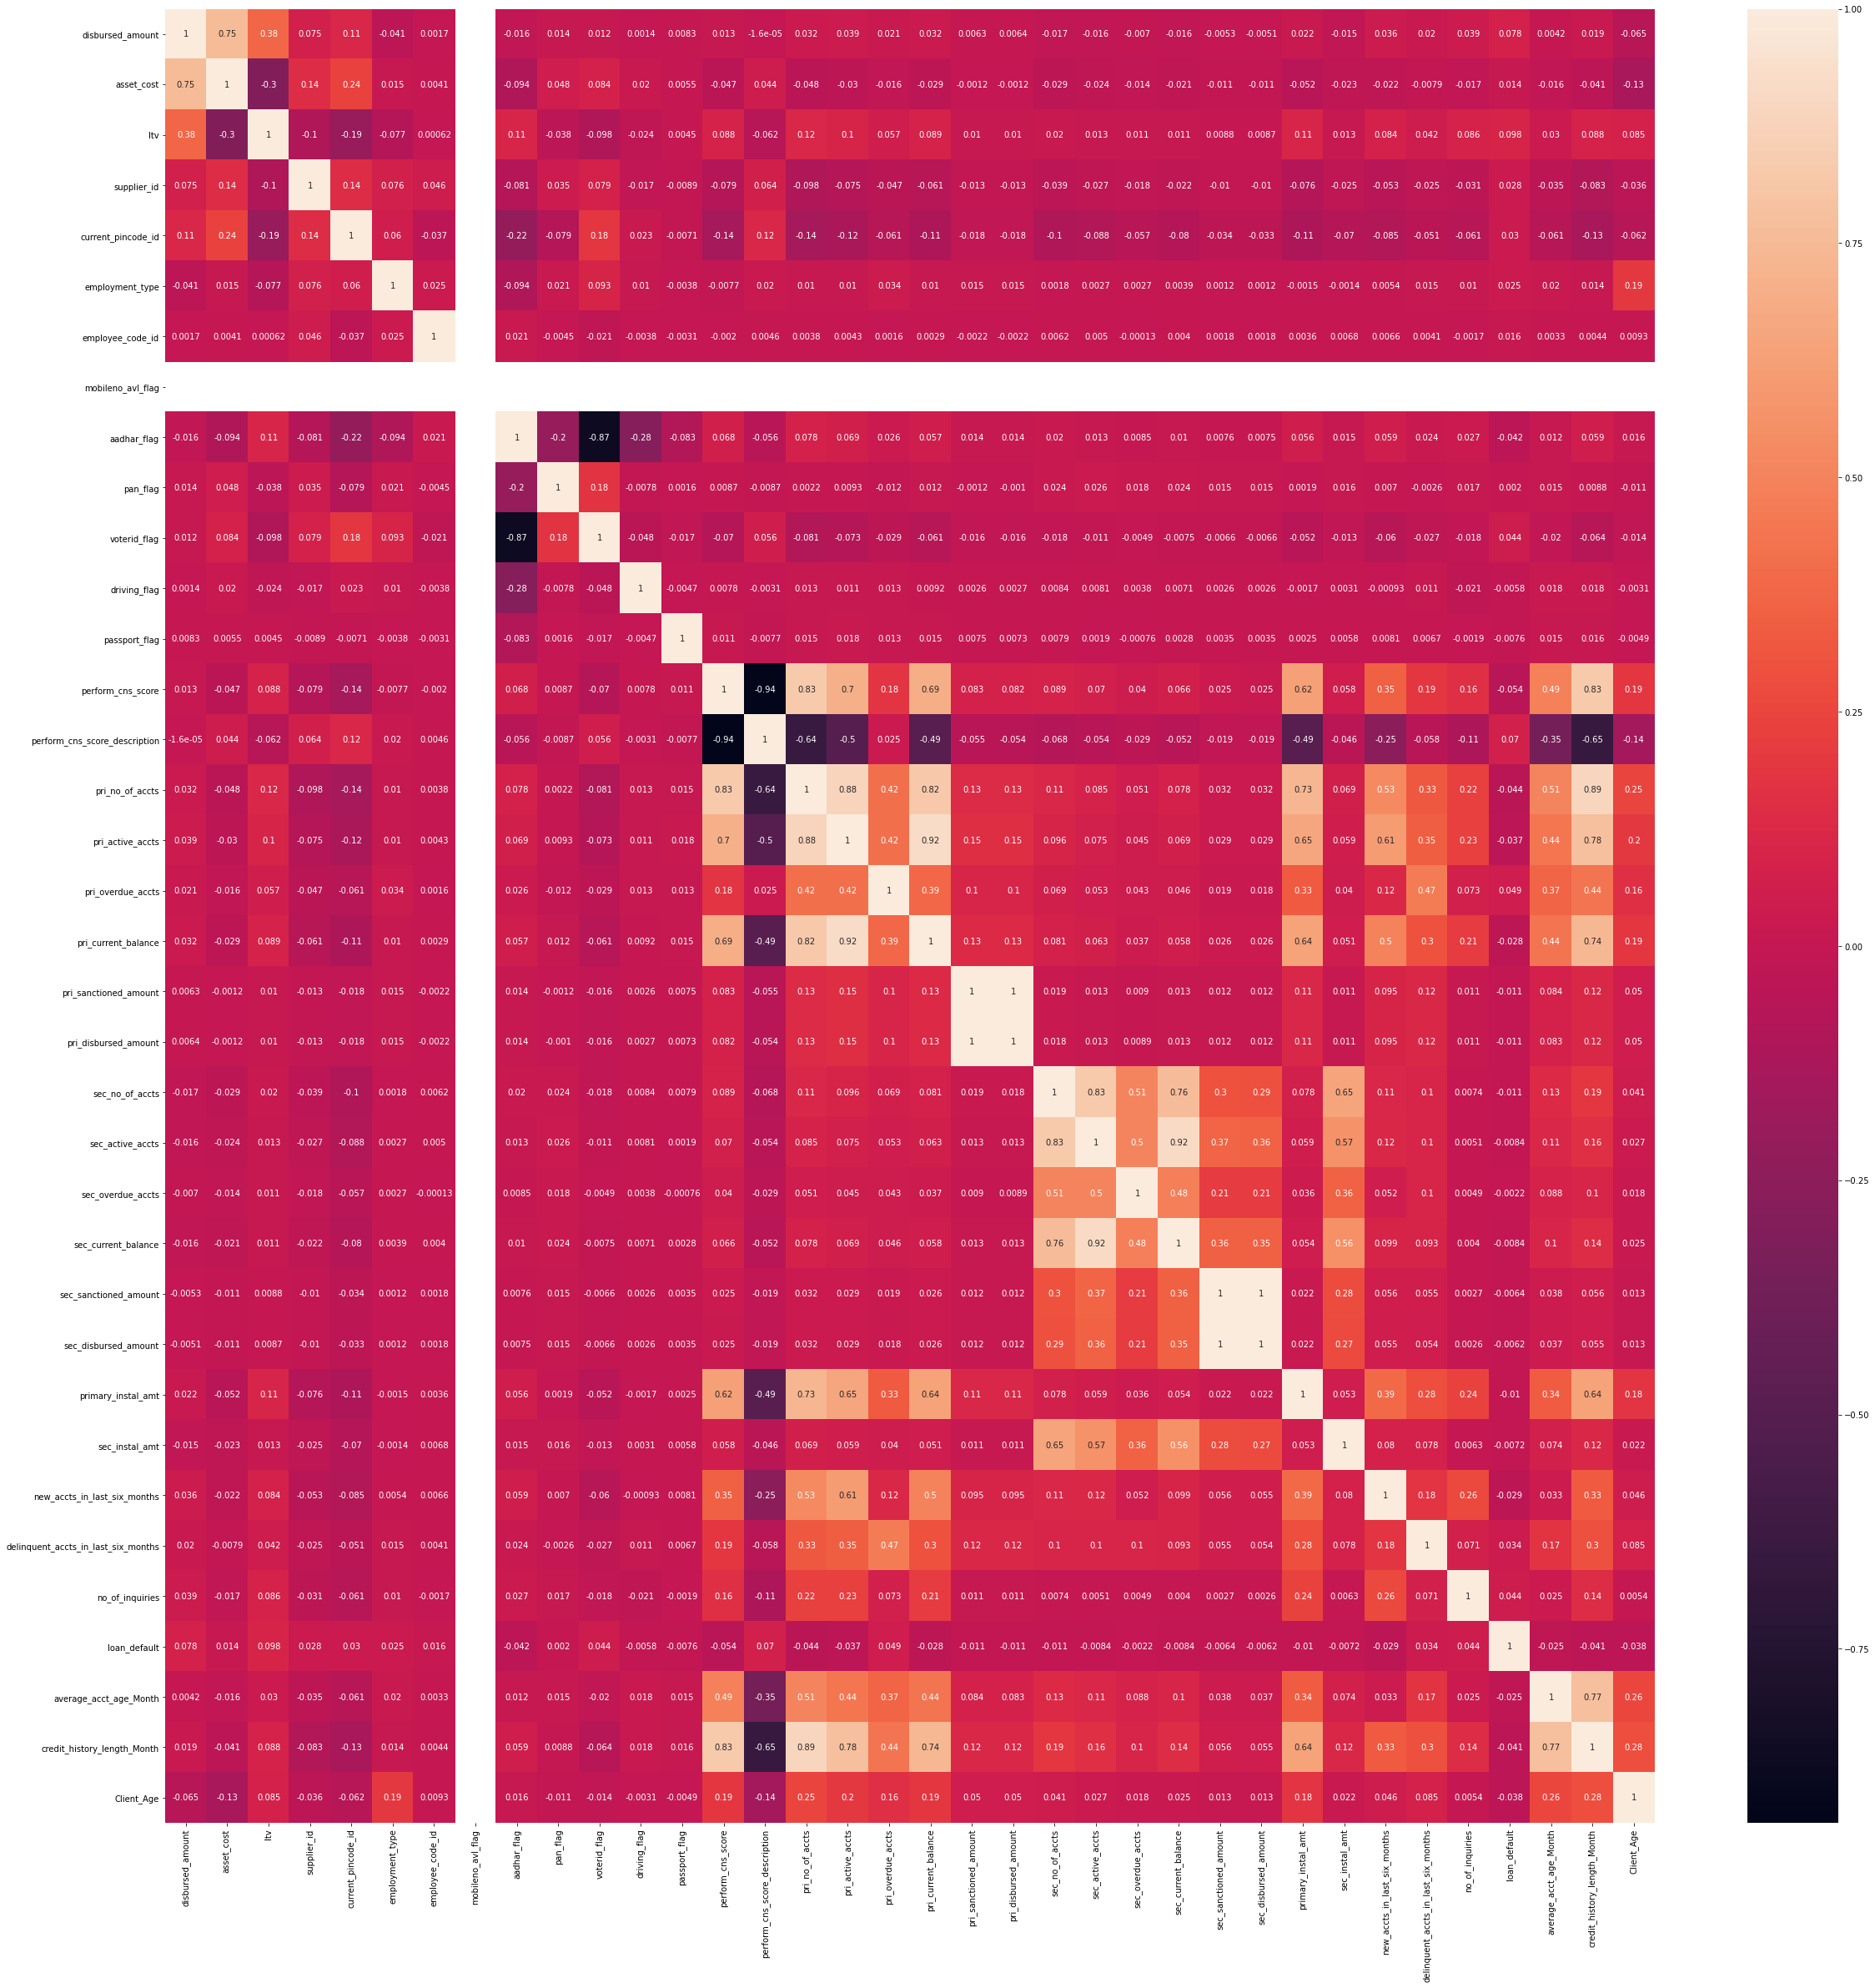

In [198]:
corr = df.corr()
top_features = corr.index
plt.figure(figsize=(40,40))
sns.heatmap(df[top_features].corr(),annot=True)

In [199]:
threshold = 0.5

In [200]:
#to remove if the correlation greater than 0.8
def correlation (dataset ,  threshold):
    col_corr         = set()
    corr_matrix      = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i , j]) > threshold:
                colname  = corr_matrix.columns[i]
                col_corr.add(colname)
            
    return col_corr

In [201]:
df = df[['disbursed_amount', 'asset_cost', 'ltv', 'supplier_id',
       'current_pincode_id', 'employment_type', 'employee_code_id',
       'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag',
       'driving_flag', 'passport_flag', 'perform_cns_score',
       'perform_cns_score_description', 'pri_no_of_accts', 'pri_active_accts',
       'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount',
       'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts',
       'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount',
       'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'no_of_inquiries', 'Client_Age', 'average_acct_age_Month',
       'credit_history_length_Month', 'loan_default']]

In [202]:
correlation(df.iloc[:,:-1],threshold)

{'asset_cost',
 'average_acct_age_Month',
 'credit_history_length_Month',
 'new_accts_in_last_six_months',
 'perform_cns_score_description',
 'pri_active_accts',
 'pri_current_balance',
 'pri_disbursed_amount',
 'pri_no_of_accts',
 'primary_instal_amt',
 'sec_active_accts',
 'sec_current_balance',
 'sec_disbursed_amount',
 'sec_instal_amt',
 'sec_overdue_accts',
 'voterid_flag'}

In [203]:
df_correlation = df[['asset_cost',
 'average_acct_age_Month','credit_history_length_Month','new_accts_in_last_six_months',
 'perform_cns_score_description','pri_active_accts','pri_current_balance','pri_disbursed_amount','pri_no_of_accts',
 'pri_sanctioned_amount','primary_instal_amt','sec_active_accts','sec_current_balance','sec_disbursed_amount',
 'sec_instal_amt','sec_overdue_accts','sec_sanctioned_amount','voterid_flag', 'loan_default']]

In [208]:
X4 = df_correlation.drop(columns=['loan_default'] , axis=1 )
y4 = df_correlation['loan_default']

def calssify_bef_corr(model , x,y):
    x4_train , x4_test ,y4_train , y4_test = train_test_split(X4,y4,test_size = 0.25 , random_state=42)
    model.fit(x4_train ,y4_train)
    y_pred = model.predict(x4_test)
    print("Accuarcy For Your Model" ,model.score( x4_test , y4_test )*100)
    score = cross_val_score(model,x,y,cv=5)
    print("Cross Validation For Your Model" , np.mean(score)*100)
    
    R2_regression = round(r2_score(y4_test, y_pred),4)
    print("R2 Regression For Your Model" , R2_regression)
    MAE_regression = int(mean_absolute_error(y4_test,y_pred))
    print("Mean Absolute Error For Your Model" , MAE_regression)
    
    print("Confusion Matrix" , confusion_matrix(y4_test,y_pred))
    print("F1 score" , f1_score(y4_test,y_pred))
    
    print('Accuracy:', accuracy_score(y4_test, y_pred))
    print('Recall:', recall_score(y4_test, y_pred))
    print('Precision:', precision_score(y4_test, y_pred))
    print('\n clasification report:\n', classification_report(y4_test,y_pred))
    print('\n confussion matrix:\n',confusion_matrix(y4_test, y_pred))
    pd.crosstab(y4_test,y_pred)
    
    #scorez=r2_score(y_test,y_pred)
    #print("Score For Your Model" , np.mean(scorez)*100)
    #print(confusion_matrix(y_test,y_pred))
    #print(classification_report(y_test,y_pred))

In [209]:
def calssify_bef_corr_smote(model , x,y):
    x4_train , x4_test ,y4_train , y4_test = train_test_split(X4,y4,test_size = 0.25 , random_state=42)
    x4_train_smote , y4_train_smote = smote.fit_sample(x4_train, y4_train)
    model.fit(x4_train_smote ,y4_train_smote)
    y_pred = model.predict(x4_test)
    print("Accuarcy For Your Model" ,model.score( x4_test , y4_test )*100)
    score = cross_val_score(model,x,y,cv=5)
    print("Cross Validation For Your Model" , np.mean(score)*100)
    
    R2_regression = round(r2_score(y4_test, y_pred),4)
    print("R2 Regression For Your Model" , R2_regression)
    MAE_regression = int(mean_absolute_error(y4_test,y_pred))
    print("Mean Absolute Error For Your Model" , MAE_regression)
    
    print("Confusion Matrix" , confusion_matrix(y4_test,y_pred))
    print("F1 score" , f1_score(y4_test,y_pred))
    
    print('Accuracy:', accuracy_score(y4_test, y_pred))
    print('Recall:', recall_score(y4_test, y_pred))
    print('Precision:', precision_score(y4_test, y_pred))
    print('\n clasification report:\n', classification_report(y4_test,y_pred))
    print('\n confussion matrix:\n',confusion_matrix(y4_test, y_pred))
    pd.crosstab(y4_test,y_pred)
    
    #scorez=r2_score(y_test,y_pred)
    #print("Score For Your Model" , np.mean(scorez)*100)
    #print(confusion_matrix(y_test,y_pred))
    #print(classification_report(y_test,y_pred))

In [210]:
model = LogisticRegression()
calssify_bef_corr(model,X4,y4)

Accuarcy For Your Model 78.189709893805
Cross Validation For Your Model 78.28645447425299
R2 Regression For Your Model -0.2789
Mean Absolute Error For Your Model 0
Confusion Matrix [[45576     0]
 [12713     0]]
F1 score 0.0
Accuracy: 0.78189709893805
Recall: 0.0
Precision: 0.0

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     45576
         1.0       0.00      0.00      0.00     12713

    accuracy                           0.78     58289
   macro avg       0.39      0.50      0.44     58289
weighted avg       0.61      0.78      0.69     58289


 confussion matrix:
 [[45576     0]
 [12713     0]]


In [211]:
model = LogisticRegression()
calssify_bef_corr_smote(model,X4,y4)

Accuarcy For Your Model 50.43147077493181
Cross Validation For Your Model 78.28645447425299
R2 Regression For Your Model -1.9067
Mean Absolute Error For Your Model 0
Confusion Matrix [[22547 23029]
 [ 5864  6849]]
F1 score 0.32161724307952383
Accuracy: 0.5043147077493181
Recall: 0.5387398725713837
Precision: 0.22923221099136487

 clasification report:
               precision    recall  f1-score   support

         0.0       0.79      0.49      0.61     45576
         1.0       0.23      0.54      0.32     12713

    accuracy                           0.50     58289
   macro avg       0.51      0.52      0.47     58289
weighted avg       0.67      0.50      0.55     58289


 confussion matrix:
 [[22547 23029]
 [ 5864  6849]]


In [212]:
model = svm.LinearSVC(random_state=20)
calssify_bef_corr(model,X4,y4)

Accuarcy For Your Model 78.17941635643089
Cross Validation For Your Model 75.7610440321535
R2 Regression For Your Model -0.2795
Mean Absolute Error For Your Model 0
Confusion Matrix [[45569     7]
 [12712     1]]
F1 score 0.00015722034431255404
Accuracy: 0.7817941635643089
Recall: 7.865963973885e-05
Precision: 0.125

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     45576
         1.0       0.12      0.00      0.00     12713

    accuracy                           0.78     58289
   macro avg       0.45      0.50      0.44     58289
weighted avg       0.64      0.78      0.69     58289


 confussion matrix:
 [[45569     7]
 [12712     1]]


In [213]:
model = svm.LinearSVC(random_state=20)
calssify_bef_corr_smote(model,X4,y4)

Accuarcy For Your Model 25.867659421160084
Cross Validation For Your Model 75.7610440321535
R2 Regression For Your Model -3.3471
Mean Absolute Error For Your Model 0
Confusion Matrix [[ 3022 42554]
 [  657 12056]]
F1 score 0.3581539741247419
Accuracy: 0.25867659421160083
Recall: 0.9483206166915755
Precision: 0.22076542757736678

 clasification report:
               precision    recall  f1-score   support

         0.0       0.82      0.07      0.12     45576
         1.0       0.22      0.95      0.36     12713

    accuracy                           0.26     58289
   macro avg       0.52      0.51      0.24     58289
weighted avg       0.69      0.26      0.17     58289


 confussion matrix:
 [[ 3022 42554]
 [  657 12056]]


In [215]:
model = DecisionTreeClassifier()
calssify_bef_corr(model,X4,y4)

Accuarcy For Your Model 69.77302750090068
Cross Validation For Your Model 69.12041059830327
R2 Regression For Your Model -0.7725
Mean Absolute Error For Your Model 0
Confusion Matrix [[38253  7323]
 [10296  2417]]
F1 score 0.2152941700440921
Accuracy: 0.6977302750090069
Recall: 0.19012034924880045
Precision: 0.24815195071868584

 clasification report:
               precision    recall  f1-score   support

         0.0       0.79      0.84      0.81     45576
         1.0       0.25      0.19      0.22     12713

    accuracy                           0.70     58289
   macro avg       0.52      0.51      0.51     58289
weighted avg       0.67      0.70      0.68     58289


 confussion matrix:
 [[38253  7323]
 [10296  2417]]


In [216]:
model = DecisionTreeClassifier()
calssify_bef_corr_smote(model,X4,y4)

Accuarcy For Your Model 63.63121686767658
Cross Validation For Your Model 69.15000474635912
R2 Regression For Your Model -1.1326
Mean Absolute Error For Your Model 0
Confusion Matrix [[33086 12490]
 [ 8709  4004]]
F1 score 0.2741808470572123
Accuracy: 0.6363121686767658
Recall: 0.3149531975143554
Precision: 0.242754941190736

 clasification report:
               precision    recall  f1-score   support

         0.0       0.79      0.73      0.76     45576
         1.0       0.24      0.31      0.27     12713

    accuracy                           0.64     58289
   macro avg       0.52      0.52      0.52     58289
weighted avg       0.67      0.64      0.65     58289


 confussion matrix:
 [[33086 12490]
 [ 8709  4004]]


In [217]:
model = RandomForestClassifier()
calssify_bef_corr(model,X4,y4)

Accuarcy For Your Model 74.4257063940023
Cross Validation For Your Model 73.87434983606745
R2 Regression For Your Model -0.4997
Mean Absolute Error For Your Model 0
Confusion Matrix [[42137  3439]
 [11468  1245]]
F1 score 0.143128125538886
Accuracy: 0.744257063940023
Recall: 0.09793125147486824
Precision: 0.265798462852263

 clasification report:
               precision    recall  f1-score   support

         0.0       0.79      0.92      0.85     45576
         1.0       0.27      0.10      0.14     12713

    accuracy                           0.74     58289
   macro avg       0.53      0.51      0.50     58289
weighted avg       0.67      0.74      0.70     58289


 confussion matrix:
 [[42137  3439]
 [11468  1245]]


In [218]:
model = RandomForestClassifier()
calssify_bef_corr_smote(model,X4,y4)

Accuarcy For Your Model 67.37806447185577
Cross Validation For Your Model 73.87949632329745
R2 Regression For Your Model -0.9129
Mean Absolute Error For Your Model 0
Confusion Matrix [[36049  9527]
 [ 9488  3225]]
F1 score 0.25328882780286666
Accuracy: 0.6737806447185576
Recall: 0.25367733815779125
Precision: 0.25290150564617314

 clasification report:
               precision    recall  f1-score   support

         0.0       0.79      0.79      0.79     45576
         1.0       0.25      0.25      0.25     12713

    accuracy                           0.67     58289
   macro avg       0.52      0.52      0.52     58289
weighted avg       0.67      0.67      0.67     58289


 confussion matrix:
 [[36049  9527]
 [ 9488  3225]]


In [219]:
model = ExtraTreesClassifier()
calssify_bef_corr(model,X4,y4)

Accuarcy For Your Model 74.17008354921168
Cross Validation For Your Model 73.77098478128391
R2 Regression For Your Model -0.5146
Mean Absolute Error For Your Model 0
Confusion Matrix [[41947  3629]
 [11427  1286]]
F1 score 0.145904243249376
Accuracy: 0.7417008354921169
Recall: 0.1011562967041611
Precision: 0.261648016276704

 clasification report:
               precision    recall  f1-score   support

         0.0       0.79      0.92      0.85     45576
         1.0       0.26      0.10      0.15     12713

    accuracy                           0.74     58289
   macro avg       0.52      0.51      0.50     58289
weighted avg       0.67      0.74      0.69     58289


 confussion matrix:
 [[41947  3629]
 [11427  1286]]


In [220]:
model = ExtraTreesClassifier()
calssify_bef_corr_smote(model,X4,y4)

Accuarcy For Your Model 68.064300296797
Cross Validation For Your Model 73.7696979640205
R2 Regression For Your Model -0.8727
Mean Absolute Error For Your Model 0
Confusion Matrix [[36661  8915]
 [ 9700  3013]]
F1 score 0.2445517633212938
Accuracy: 0.68064300296797
Recall: 0.23700149453315503
Precision: 0.25259892689470154

 clasification report:
               precision    recall  f1-score   support

         0.0       0.79      0.80      0.80     45576
         1.0       0.25      0.24      0.24     12713

    accuracy                           0.68     58289
   macro avg       0.52      0.52      0.52     58289
weighted avg       0.67      0.68      0.68     58289


 confussion matrix:
 [[36661  8915]
 [ 9700  3013]]


In [221]:
model = RandomForestClassifier(n_estimators=25 , max_depth=7 , min_samples_split=25 , max_features=1)
calssify_bef_corr(model,X4,y4)

Accuarcy For Your Model 78.189709893805
Cross Validation For Your Model 78.29288796270488
R2 Regression For Your Model -0.2789
Mean Absolute Error For Your Model 0
Confusion Matrix [[45576     0]
 [12713     0]]
F1 score 0.0
Accuracy: 0.78189709893805
Recall: 0.0
Precision: 0.0

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     45576
         1.0       0.00      0.00      0.00     12713

    accuracy                           0.78     58289
   macro avg       0.39      0.50      0.44     58289
weighted avg       0.61      0.78      0.69     58289


 confussion matrix:
 [[45576     0]
 [12713     0]]


In [222]:
model = RandomForestClassifier(n_estimators=25 , max_depth=7 , min_samples_split=25 , max_features=1)
calssify_bef_corr_smote(model,X4,y4)

Accuarcy For Your Model 45.718746247147834
Cross Validation For Your Model 78.29288796270488
R2 Regression For Your Model -2.183
Mean Absolute Error For Your Model 0
Confusion Matrix [[17908 27668]
 [ 3972  8741]]
F1 score 0.3558894181832987
Accuracy: 0.45718746247147835
Recall: 0.6875639109572879
Precision: 0.24007800269164217

 clasification report:
               precision    recall  f1-score   support

         0.0       0.82      0.39      0.53     45576
         1.0       0.24      0.69      0.36     12713

    accuracy                           0.46     58289
   macro avg       0.53      0.54      0.44     58289
weighted avg       0.69      0.46      0.49     58289


 confussion matrix:
 [[17908 27668]
 [ 3972  8741]]


In [223]:
model = RandomForestClassifier(n_estimators=100 , max_depth=7 , min_samples_split=25 , max_features=1)
calssify_bef_corr(model,X4,y4)

Accuarcy For Your Model 78.189709893805
Cross Validation For Your Model 78.29288796270488
R2 Regression For Your Model -0.2789
Mean Absolute Error For Your Model 0
Confusion Matrix [[45576     0]
 [12713     0]]
F1 score 0.0
Accuracy: 0.78189709893805
Recall: 0.0
Precision: 0.0

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     45576
         1.0       0.00      0.00      0.00     12713

    accuracy                           0.78     58289
   macro avg       0.39      0.50      0.44     58289
weighted avg       0.61      0.78      0.69     58289


 confussion matrix:
 [[45576     0]
 [12713     0]]


In [224]:
model = RandomForestClassifier(n_estimators=100 , max_depth=7 , min_samples_split=25 , max_features=1)
calssify_bef_corr_smote(model,X4,y4)

Accuarcy For Your Model 47.16670383777385
Cross Validation For Your Model 78.29288796270488
R2 Regression For Your Model -2.0981
Mean Absolute Error For Your Model 0
Confusion Matrix [[19200 26376]
 [ 4420  8293]]
F1 score 0.3500485416402853
Accuracy: 0.4716670383777385
Recall: 0.652324392354283
Precision: 0.239205053506014

 clasification report:
               precision    recall  f1-score   support

         0.0       0.81      0.42      0.55     45576
         1.0       0.24      0.65      0.35     12713

    accuracy                           0.47     58289
   macro avg       0.53      0.54      0.45     58289
weighted avg       0.69      0.47      0.51     58289


 confussion matrix:
 [[19200 26376]
 [ 4420  8293]]


In [225]:
#thershold = 0.8

df_correlationsma  = df[['credit_history_length_Month','perform_cns_score_description','pri_active_accts','pri_current_balance',
 'pri_disbursed_amount','pri_no_of_accts','pri_sanctioned_amount','sec_active_accts','sec_current_balance',
 'sec_disbursed_amount' ,'voterid_flag' , 'loan_default']]

In [226]:
X5 = df_correlationsma.drop(columns=['loan_default'] , axis=1 )
y5 = df_correlationsma['loan_default']

def calssify_bef_corrsma(model , x,y):
    x5_train , x5_test ,y5_train , y5_test = train_test_split(X5,y5,test_size = 0.25 , random_state=42)
    model.fit(x5_train ,y5_train)
    y_pred = model.predict(x5_test)
    print("Accuarcy For Your Model" ,model.score( x5_test , y5_test )*100)
    score = cross_val_score(model,x,y,cv=5)
    print("Cross Validation For Your Model" , np.mean(score)*100)
    
    R2_regression = round(r2_score(y5_test, y_pred),4)
    print("R2 Regression For Your Model" , R2_regression)
    MAE_regression = int(mean_absolute_error(y5_test,y_pred))
    print("Mean Absolute Error For Your Model" , MAE_regression)
    
    print("Confusion Matrix" , confusion_matrix(y5_test,y_pred))
    print("F1 score" , f1_score(y5_test,y_pred))
    
    print('Accuracy:', accuracy_score(y5_test, y_pred))
    print('Recall:', recall_score(y5_test, y_pred))
    print('Precision:', precision_score(y5_test, y_pred))
    print('\n clasification report:\n', classification_report(y5_test,y_pred))
    print('\n confussion matrix:\n',confusion_matrix(y5_test, y_pred))
    pd.crosstab(y5_test,y_pred)
    
    
    #scorez=r2_score(y_test,y_pred)
    #print("Score For Your Model" , np.mean(scorez)*100)
    #print(confusion_matrix(y_test,y_pred))
    #print(classification_report(y_test,y_pred))

In [227]:
X5 = df_correlationsma.drop(columns=['loan_default'] , axis=1 )
y5 = df_correlationsma['loan_default']

def calssify_bef_corrsma_somte(model , x,y):
    x5_train , x5_test ,y5_train , y5_test = train_test_split(X5,y5,test_size = 0.25 , random_state=42)
    x5_train_smote , y5_train_smote = smote.fit_sample(x5_train, y5_train)
    model.fit(x5_train_smote ,y5_train_smote)
    y_pred = model.predict(x5_test)
    print("Accuarcy For Your Model" ,model.score( x5_test , y5_test )*100)
    score = cross_val_score(model,x,y,cv=5)
    print("Cross Validation For Your Model" , np.mean(score)*100)
    
    R2_regression = round(r2_score(y5_test, y_pred),4)
    print("R2 Regression For Your Model" , R2_regression)
    MAE_regression = int(mean_absolute_error(y5_test,y_pred))
    print("Mean Absolute Error For Your Model" , MAE_regression)
    
    print("Confusion Matrix" , confusion_matrix(y5_test,y_pred))
    print("F1 score" , f1_score(y5_test,y_pred))
    
    print('Accuracy:', accuracy_score(y5_test, y_pred))
    print('Recall:', recall_score(y5_test, y_pred))
    print('Precision:', precision_score(y5_test, y_pred))
    print('\n clasification report:\n', classification_report(y5_test,y_pred))
    print('\n confussion matrix:\n',confusion_matrix(y5_test, y_pred))
    pd.crosstab(y5_test,y_pred)
    
    
    #scorez=r2_score(y_test,y_pred)
    #print("Score For Your Model" , np.mean(scorez)*100)
    #print(confusion_matrix(y_test,y_pred))
    #print(classification_report(y_test,y_pred))

In [228]:
model = LogisticRegression()
calssify_bef_corrsma(model,X5,y5)

Accuarcy For Your Model 78.189709893805
Cross Validation For Your Model 78.28173657352369
R2 Regression For Your Model -0.2789
Mean Absolute Error For Your Model 0
Confusion Matrix [[45576     0]
 [12713     0]]
F1 score 0.0
Accuracy: 0.78189709893805
Recall: 0.0
Precision: 0.0

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     45576
         1.0       0.00      0.00      0.00     12713

    accuracy                           0.78     58289
   macro avg       0.39      0.50      0.44     58289
weighted avg       0.61      0.78      0.69     58289


 confussion matrix:
 [[45576     0]
 [12713     0]]


In [229]:
model = LogisticRegression()
calssify_bef_corrsma_somte(model,X5,y5)

Accuarcy For Your Model 48.99723790080461
Cross Validation For Your Model 78.28173657352369
R2 Regression For Your Model -1.9908
Mean Absolute Error For Your Model 0
Confusion Matrix [[21287 24289]
 [ 5440  7273]]
F1 score 0.3285375494071146
Accuracy: 0.48997237900804613
Recall: 0.5720915598206561
Precision: 0.23043533362904758

 clasification report:
               precision    recall  f1-score   support

         0.0       0.80      0.47      0.59     45576
         1.0       0.23      0.57      0.33     12713

    accuracy                           0.49     58289
   macro avg       0.51      0.52      0.46     58289
weighted avg       0.67      0.49      0.53     58289


 confussion matrix:
 [[21287 24289]
 [ 5440  7273]]


In [230]:
model = LogisticRegression(max_iter=5000)
calssify_bef_corrsma(model,X5,y5)

Accuarcy For Your Model 78.189709893805
Cross Validation For Your Model 78.28173657352369
R2 Regression For Your Model -0.2789
Mean Absolute Error For Your Model 0
Confusion Matrix [[45576     0]
 [12713     0]]
F1 score 0.0
Accuracy: 0.78189709893805
Recall: 0.0
Precision: 0.0

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     45576
         1.0       0.00      0.00      0.00     12713

    accuracy                           0.78     58289
   macro avg       0.39      0.50      0.44     58289
weighted avg       0.61      0.78      0.69     58289


 confussion matrix:
 [[45576     0]
 [12713     0]]


In [231]:
model = LogisticRegression(max_iter=5000)
calssify_bef_corrsma_somte(model,X5,y5)

Accuarcy For Your Model 48.99209113211755
Cross Validation For Your Model 78.28173657352369
R2 Regression For Your Model -1.9911
Mean Absolute Error For Your Model 0
Confusion Matrix [[21281 24295]
 [ 5437  7276]]
F1 score 0.32860626862975345
Accuracy: 0.48992091132117555
Recall: 0.5723275387398725
Precision: 0.2304646669411802

 clasification report:
               precision    recall  f1-score   support

         0.0       0.80      0.47      0.59     45576
         1.0       0.23      0.57      0.33     12713

    accuracy                           0.49     58289
   macro avg       0.51      0.52      0.46     58289
weighted avg       0.67      0.49      0.53     58289


 confussion matrix:
 [[21281 24295]
 [ 5437  7276]]


In [232]:
model = svm.LinearSVC(random_state=20)
calssify_bef_corrsma(model,X5,y5)

Accuarcy For Your Model 59.29763763317264
Cross Validation For Your Model 75.32957176536593
R2 Regression For Your Model -1.3868
Mean Absolute Error For Your Model 0
Confusion Matrix [[30777 14799]
 [ 8926  3787]]
F1 score 0.2419885619348861
Accuracy: 0.5929763763317264
Recall: 0.29788405569102494
Precision: 0.20375551490369095

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      0.68      0.72     45576
         1.0       0.20      0.30      0.24     12713

    accuracy                           0.59     58289
   macro avg       0.49      0.49      0.48     58289
weighted avg       0.65      0.59      0.62     58289


 confussion matrix:
 [[30777 14799]
 [ 8926  3787]]


In [233]:
model = svm.LinearSVC(random_state=20)
calssify_bef_corrsma_somte(model,X5,y5)

Accuarcy For Your Model 49.203108648286985
Cross Validation For Your Model 75.32957176536593
R2 Regression For Your Model -1.9787
Mean Absolute Error For Your Model 0
Confusion Matrix [[21536 24040]
 [ 5569  7144]]
F1 score 0.32548921338588055
Accuracy: 0.49203108648286986
Recall: 0.5619444662943444
Precision: 0.22909184197024116

 clasification report:
               precision    recall  f1-score   support

         0.0       0.79      0.47      0.59     45576
         1.0       0.23      0.56      0.33     12713

    accuracy                           0.49     58289
   macro avg       0.51      0.52      0.46     58289
weighted avg       0.67      0.49      0.53     58289


 confussion matrix:
 [[21536 24040]
 [ 5569  7144]]


In [234]:
model = DecisionTreeClassifier()
calssify_bef_corrsma(model,X5,y5)

Accuarcy For Your Model 73.36718763403044
Cross Validation For Your Model 73.34122517727886
R2 Regression For Your Model -0.5617
Mean Absolute Error For Your Model 0
Confusion Matrix [[41433  4143]
 [11381  1332]]
F1 score 0.14647020013195514
Accuracy: 0.7336718763403044
Recall: 0.1047746401321482
Precision: 0.2432876712328767

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      0.91      0.84     45576
         1.0       0.24      0.10      0.15     12713

    accuracy                           0.73     58289
   macro avg       0.51      0.51      0.49     58289
weighted avg       0.67      0.73      0.69     58289


 confussion matrix:
 [[41433  4143]
 [11381  1332]]


In [235]:
model = DecisionTreeClassifier()
calssify_bef_corrsma_somte(model,X5,y5)

Accuarcy For Your Model 45.54204052222546
Cross Validation For Your Model 73.3167781143181
R2 Regression For Your Model -2.1934
Mean Absolute Error For Your Model 0
Confusion Matrix [[18292 27284]
 [ 4459  8254]]
F1 score 0.342127624297942
Accuracy: 0.45542040522225463
Recall: 0.6492566664044679
Precision: 0.23225842759862683

 clasification report:
               precision    recall  f1-score   support

         0.0       0.80      0.40      0.54     45576
         1.0       0.23      0.65      0.34     12713

    accuracy                           0.46     58289
   macro avg       0.52      0.53      0.44     58289
weighted avg       0.68      0.46      0.49     58289


 confussion matrix:
 [[18292 27284]
 [ 4459  8254]]


In [236]:
model = RandomForestClassifier()
calssify_bef_corrsma(model,X5,y5)

Accuarcy For Your Model 77.41769459074611
Cross Validation For Your Model 77.43765957738304
R2 Regression For Your Model -0.3242
Mean Absolute Error For Your Model 0
Confusion Matrix [[44740   836]
 [12327   386]]
F1 score 0.055400071761750984
Accuracy: 0.7741769459074611
Recall: 0.0303626209391961
Precision: 0.3158756137479542

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      0.98      0.87     45576
         1.0       0.32      0.03      0.06     12713

    accuracy                           0.77     58289
   macro avg       0.55      0.51      0.46     58289
weighted avg       0.68      0.77      0.69     58289


 confussion matrix:
 [[44740   836]
 [12327   386]]


In [237]:
model = RandomForestClassifier()
calssify_bef_corrsma_somte(model,X5,y5)

Accuarcy For Your Model 49.15164096141639
Cross Validation For Your Model 77.43422834675033
R2 Regression For Your Model -1.9817
Mean Absolute Error For Your Model 0
Confusion Matrix [[21119 24457]
 [ 5182  7531]]
F1 score 0.33694995637681485
Accuracy: 0.49151640961416393
Recall: 0.5923857468732793
Precision: 0.2354320370138802

 clasification report:
               precision    recall  f1-score   support

         0.0       0.80      0.46      0.59     45576
         1.0       0.24      0.59      0.34     12713

    accuracy                           0.49     58289
   macro avg       0.52      0.53      0.46     58289
weighted avg       0.68      0.49      0.53     58289


 confussion matrix:
 [[21119 24457]
 [ 5182  7531]]


In [239]:
model = ExtraTreesClassifier()
calssify_bef_corrsma(model,X5,y5)

Accuarcy For Your Model 76.8361097291084
Cross Validation For Your Model 76.86078798814313
R2 Regression For Your Model -0.3583
Mean Absolute Error For Your Model 0
Confusion Matrix [[44221  1355]
 [12147   566]]
F1 score 0.07735410687440207
Accuracy: 0.768361097291084
Recall: 0.044521356092189095
Precision: 0.2946382092660073

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      0.97      0.87     45576
         1.0       0.29      0.04      0.08     12713

    accuracy                           0.77     58289
   macro avg       0.54      0.51      0.47     58289
weighted avg       0.68      0.77      0.70     58289


 confussion matrix:
 [[44221  1355]
 [12147   566]]


In [240]:
model = ExtraTreesClassifier()
calssify_bef_corrsma_somte(model,X5,y5)

Accuarcy For Your Model 48.70215649607988
Cross Validation For Your Model 76.84877842338676
R2 Regression For Your Model -2.0081
Mean Absolute Error For Your Model 0
Confusion Matrix [[20768 24808]
 [ 5093  7620]]
F1 score 0.3376088256795374
Accuracy: 0.4870215649607988
Recall: 0.5993864548100369
Precision: 0.23498211422227705

 clasification report:
               precision    recall  f1-score   support

         0.0       0.80      0.46      0.58     45576
         1.0       0.23      0.60      0.34     12713

    accuracy                           0.49     58289
   macro avg       0.52      0.53      0.46     58289
weighted avg       0.68      0.49      0.53     58289


 confussion matrix:
 [[20768 24808]
 [ 5093  7620]]


In [241]:
model = RandomForestClassifier(n_estimators=25 , max_depth=7 , min_samples_split=25 , max_features=1)
calssify_bef_corrsma(model,X5,y5)

Accuarcy For Your Model 78.189709893805
Cross Validation For Your Model 78.29288796270488
R2 Regression For Your Model -0.2789
Mean Absolute Error For Your Model 0
Confusion Matrix [[45576     0]
 [12713     0]]
F1 score 0.0
Accuracy: 0.78189709893805
Recall: 0.0
Precision: 0.0

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     45576
         1.0       0.00      0.00      0.00     12713

    accuracy                           0.78     58289
   macro avg       0.39      0.50      0.44     58289
weighted avg       0.61      0.78      0.69     58289


 confussion matrix:
 [[45576     0]
 [12713     0]]


In [242]:
model = RandomForestClassifier(n_estimators=25 , max_depth=7 , min_samples_split=25 , max_features=1)
calssify_bef_corrsma_somte(model,X5,y5)

Accuarcy For Your Model 44.40632023194771
Cross Validation For Your Model 78.29288796270488
R2 Regression For Your Model -2.26
Mean Absolute Error For Your Model 0
Confusion Matrix [[16716 28860]
 [ 3545  9168]]
F1 score 0.36136457696931473
Accuracy: 0.4440632023194771
Recall: 0.7211515771257767
Precision: 0.24108551593562638

 clasification report:
               precision    recall  f1-score   support

         0.0       0.83      0.37      0.51     45576
         1.0       0.24      0.72      0.36     12713

    accuracy                           0.44     58289
   macro avg       0.53      0.54      0.43     58289
weighted avg       0.70      0.44      0.48     58289


 confussion matrix:
 [[16716 28860]
 [ 3545  9168]]


In [243]:
model = RandomForestClassifier(n_estimators=100 , max_depth=7 , min_samples_split=25 , max_features=1)
calssify_bef_corrsma(model,X5,y5)

Accuarcy For Your Model 78.189709893805
Cross Validation For Your Model 78.29288796270488
R2 Regression For Your Model -0.2789
Mean Absolute Error For Your Model 0
Confusion Matrix [[45576     0]
 [12713     0]]
F1 score 0.0
Accuracy: 0.78189709893805
Recall: 0.0
Precision: 0.0

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     45576
         1.0       0.00      0.00      0.00     12713

    accuracy                           0.78     58289
   macro avg       0.39      0.50      0.44     58289
weighted avg       0.61      0.78      0.69     58289


 confussion matrix:
 [[45576     0]
 [12713     0]]


In [244]:
model = RandomForestClassifier(n_estimators=100 , max_depth=7 , min_samples_split=25 , max_features=1)
calssify_bef_corrsma_somte(model,X5,y5)

Accuarcy For Your Model 45.58493026128429
Cross Validation For Your Model 78.29288796270488
R2 Regression For Your Model -2.1909
Mean Absolute Error For Your Model 0
Confusion Matrix [[17753 27823]
 [ 3895  8818]]
F1 score 0.3573367913441666
Accuracy: 0.4558493026128429
Recall: 0.6936207032171793
Precision: 0.24065937065036436

 clasification report:
               precision    recall  f1-score   support

         0.0       0.82      0.39      0.53     45576
         1.0       0.24      0.69      0.36     12713

    accuracy                           0.46     58289
   macro avg       0.53      0.54      0.44     58289
weighted avg       0.69      0.46      0.49     58289


 confussion matrix:
 [[17753 27823]
 [ 3895  8818]]


### information gain algorithm

In [245]:
#### Find highly correlation features

from sklearn.feature_selection import mutual_info_classif

In [246]:
mutual_info = mutual_info_classif(X,y)

In [247]:
mutual_data = pd.Series(mutual_info , index = X.columns)
mutual_data.sort_values(ascending = False)

mobileno_avl_flag                      0.037873
aadhar_flag                            0.027215
employment_type                        0.018478
perform_cns_score_description          0.014896
employee_code_id                       0.014842
supplier_id                            0.013923
current_pincode_id                     0.013728
perform_cns_score                      0.008593
disbursed_amount                       0.007046
ltv                                    0.006243
asset_cost                             0.004514
pri_no_of_accts                        0.003163
pri_sanctioned_amount                  0.002728
sec_current_balance                    0.002514
pri_current_balance                    0.002309
pri_disbursed_amount                   0.002197
pri_active_accts                       0.001854
no_of_inquiries                        0.001775
delinquent_accts_in_last_six_months    0.001458
voterid_flag                           0.001427
Client_Age                             0

# Model

#### Train Dataset

In [178]:
df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'supplier_id',
       'current_pincode_id', 'employment_type', 'employee_code_id',
       'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag',
       'driving_flag', 'passport_flag', 'perform_cns_score',
       'perform_cns_score_description', 'pri_no_of_accts', 'pri_active_accts',
       'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount',
       'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts',
       'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount',
       'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'no_of_inquiries', 'Client_Age', 'average_acct_age_Month',
       'credit_history_length_Month', 'loan_default'],
      dtype='object')

In [248]:
df_train = df[['average_acct_age_Month' , 'perform_cns_score_description' , 'no_of_inquiries' ,
              'credit_history_length_Month' , 'new_accts_in_last_six_months' , 'delinquent_accts_in_last_six_months' ,
              'voterid_flag' ,  'pri_sanctioned_amount' , 'pri_disbursed_amount' ,'pri_overdue_accts' , 'pri_current_balance',
               'pri_no_of_accts' , 'perform_cns_score' , 'primary_instal_amt' , 'pri_active_accts' ,'loan_default'
              ]]

In [249]:
df_train.head()

,average_acct_age_Month,perform_cns_score_description,no_of_inquiries,credit_history_length_Month,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,voterid_flag,pri_sanctioned_amount,pri_disbursed_amount,pri_overdue_accts,pri_current_balance,pri_no_of_accts,perform_cns_score,primary_instal_amt,pri_active_accts,loan_default
0,0.0,13.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,23.0,8.0,0.0,3.178054,0.0,1.0,0.0,50200.0,50200.0,0.526589,2.418198,0.526589,0.513967,7.596894,0.526589,1.0
2,0.0,13.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,8.0,11.0,1.0,2.772589,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.869742,0.294680,3.465736,0.000000,1.0
4,0.0,13.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


#### Train Test Split

In [251]:
X = df_train.drop(columns=['loan_default'] , axis=1 )
y = df_train['loan_default']
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train , y_test = train_test_split(X,y,test_size = 0.25 , random_state=42)

In [252]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(174865, 15)
(58289, 15)
(58289,)
(174865,)


#### Model Training

In [259]:
def calssify(model , x,y):
    x_train , x_test ,y_train , y_test = train_test_split(X,y,test_size = 0.25 , random_state=42)
    model.fit(x_train ,y_train)
    y_pred = model.predict(x_test)
    print("Accuarcy For Your Model" ,model.score( x_test , y_test )*100)
    score = cross_val_score(model,x,y,cv=5)
    print("Cross Validation For Your Model" , np.mean(score)*100)
    
    R2_regression = round(r2_score(y_test, y_pred),4)
    print("R2 Regression For Your Model" , R2_regression)
    MAE_regression = int(mean_absolute_error(y_test,y_pred))
    print("Mean Absolute Error For Your Model" , MAE_regression)
     
    print("Confusion Matrix" , confusion_matrix(y_test,y_pred))
    print("F1 score" , f1_score(y_test,y_pred))
    
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('\n clasification report:\n', classification_report(y_test,y_pred))
    print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))
    pd.crosstab(y_test,y_pred)
    
    
    #scorez=r2_score(y_test,y_pred)
    #print("Score For Your Model" , np.mean(scorez)*100)
    #print(confusion_matrix(y_test,y_pred))
    #print(classification_report(y_test,y_pred))

In [260]:
def calssifySMOTE(model , x,y):
    x_train , x_test ,y_train , y_test = train_test_split(X,y,test_size = 0.25 , random_state=42)
    x_train_smote , y_train_smote = smote.fit_sample(x_train, y_train)
    model.fit(x_train_smote ,y_train_smote)
    y_pred = model.predict(x_test)
    print("Accuarcy For Your Model" ,model.score( x_test , y_test )*100)
    score = cross_val_score(model,x,y,cv=5)
    print("Cross Validation For Your Model" , np.mean(score)*100)
    
    R2_regression = round(r2_score(y_test, y_pred),4)
    print("R2 Regression For Your Model" , R2_regression)
    MAE_regression = int(mean_absolute_error(y_test,y_pred))
    print("Mean Absolute Error For Your Model" , MAE_regression)
     
    print("Confusion Matrix" , confusion_matrix(y_test,y_pred))
    print("F1 score" , f1_score(y_test,y_pred))
    
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('\n clasification report:\n', classification_report(y_test,y_pred))
    print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))
    pd.crosstab(y_test,y_pred)
    
    
    #scorez=r2_score(y_test,y_pred)
    #print("Score For Your Model" , np.mean(scorez)*100)
    #print(confusion_matrix(y_test,y_pred))
    #print(classification_report(y_test,y_pred))

# Models 

#### Logistic Regression

In [261]:
model = LogisticRegression()
calssify(model,X,y)

Accuarcy For Your Model 78.189709893805
Cross Validation For Your Model 78.28516777656262
R2 Regression For Your Model -0.2789
Mean Absolute Error For Your Model 0
Confusion Matrix [[45576     0]
 [12713     0]]
F1 score 0.0
Accuracy: 0.78189709893805
Recall: 0.0
Precision: 0.0

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     45576
         1.0       0.00      0.00      0.00     12713

    accuracy                           0.78     58289
   macro avg       0.39      0.50      0.44     58289
weighted avg       0.61      0.78      0.69     58289


 confussion matrix:
 [[45576     0]
 [12713     0]]


In [262]:
model = LogisticRegression()
calssifySMOTE(model,X,y)

Accuarcy For Your Model 50.378287498498864
Cross Validation For Your Model 78.28516777656262
R2 Regression For Your Model -1.9098
Mean Absolute Error For Your Model 0
Confusion Matrix [[22478 23098]
 [ 5826  6887]]
F1 score 0.3225912220712914
Accuracy: 0.5037828749849886
Recall: 0.5417289388814599
Precision: 0.22968150742037685

 clasification report:
               precision    recall  f1-score   support

         0.0       0.79      0.49      0.61     45576
         1.0       0.23      0.54      0.32     12713

    accuracy                           0.50     58289
   macro avg       0.51      0.52      0.47     58289
weighted avg       0.67      0.50      0.55     58289


 confussion matrix:
 [[22478 23098]
 [ 5826  6887]]


In [264]:
regressor = LinearRegression()
calssify(model,X,y)

Accuarcy For Your Model 78.189709893805
Cross Validation For Your Model 78.28516777656262
R2 Regression For Your Model -0.2789
Mean Absolute Error For Your Model 0
Confusion Matrix [[45576     0]
 [12713     0]]
F1 score 0.0
Accuracy: 0.78189709893805
Recall: 0.0
Precision: 0.0

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     45576
         1.0       0.00      0.00      0.00     12713

    accuracy                           0.78     58289
   macro avg       0.39      0.50      0.44     58289
weighted avg       0.61      0.78      0.69     58289


 confussion matrix:
 [[45576     0]
 [12713     0]]


In [265]:
regressor = LinearRegression()
calssifySMOTE(model,X,y)

Accuarcy For Your Model 50.38000308806121
Cross Validation For Your Model 78.28516777656262
R2 Regression For Your Model -1.9097
Mean Absolute Error For Your Model 0
Confusion Matrix [[22501 23075]
 [ 5848  6865]]
F1 score 0.3218999835884932
Accuracy: 0.5038000308806121
Recall: 0.5399984268072052
Precision: 0.22929191716766867

 clasification report:
               precision    recall  f1-score   support

         0.0       0.79      0.49      0.61     45576
         1.0       0.23      0.54      0.32     12713

    accuracy                           0.50     58289
   macro avg       0.51      0.52      0.47     58289
weighted avg       0.67      0.50      0.55     58289


 confussion matrix:
 [[22501 23075]
 [ 5848  6865]]


In [266]:
model = svm.LinearSVC(random_state=20)
calssify(model,X,y)

Accuarcy For Your Model 78.03702242275557
Cross Validation For Your Model 73.70066385975744
R2 Regression For Your Model -0.2879
Mean Absolute Error For Your Model 0
Confusion Matrix [[45441   135]
 [12667    46]]
F1 score 0.007135101597642314
Accuracy: 0.7803702242275558
Recall: 0.0036183434279870997
Precision: 0.2541436464088398

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     45576
         1.0       0.25      0.00      0.01     12713

    accuracy                           0.78     58289
   macro avg       0.52      0.50      0.44     58289
weighted avg       0.67      0.78      0.69     58289


 confussion matrix:
 [[45441   135]
 [12667    46]]


In [267]:
model = svm.LinearSVC(random_state=20)
calssifySMOTE(model,X,y)

Accuarcy For Your Model 60.41277084870216
Cross Validation For Your Model 73.70066385975744
R2 Regression For Your Model -1.3214
Mean Absolute Error For Your Model 0
Confusion Matrix [[30202 15374]
 [ 7701  5012]]
F1 score 0.3028490286715611
Accuracy: 0.6041277084870216
Recall: 0.39424211437111617
Precision: 0.24585499852840184

 clasification report:
               precision    recall  f1-score   support

         0.0       0.80      0.66      0.72     45576
         1.0       0.25      0.39      0.30     12713

    accuracy                           0.60     58289
   macro avg       0.52      0.53      0.51     58289
weighted avg       0.68      0.60      0.63     58289


 confussion matrix:
 [[30202 15374]
 [ 7701  5012]]


In [268]:
regressor = DecisionTreeClassifier()
calssify(model,X,y)

Accuarcy For Your Model 78.03702242275557
Cross Validation For Your Model 73.70066385975744
R2 Regression For Your Model -0.2879
Mean Absolute Error For Your Model 0
Confusion Matrix [[45441   135]
 [12667    46]]
F1 score 0.007135101597642314
Accuracy: 0.7803702242275558
Recall: 0.0036183434279870997
Precision: 0.2541436464088398

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     45576
         1.0       0.25      0.00      0.01     12713

    accuracy                           0.78     58289
   macro avg       0.52      0.50      0.44     58289
weighted avg       0.67      0.78      0.69     58289


 confussion matrix:
 [[45441   135]
 [12667    46]]


In [269]:
regressor = DecisionTreeClassifier()
calssifySMOTE(model,X,y)

Accuarcy For Your Model 65.21642162329084
Cross Validation For Your Model 73.70066385975744
R2 Regression For Your Model -1.0397
Mean Absolute Error For Your Model 0
Confusion Matrix [[34516 11060]
 [ 9215  3498]]
F1 score 0.2565362472956621
Accuracy: 0.6521642162329084
Recall: 0.27515141980649727
Precision: 0.2402802582772359

 clasification report:
               precision    recall  f1-score   support

         0.0       0.79      0.76      0.77     45576
         1.0       0.24      0.28      0.26     12713

    accuracy                           0.65     58289
   macro avg       0.51      0.52      0.51     58289
weighted avg       0.67      0.65      0.66     58289


 confussion matrix:
 [[34516 11060]
 [ 9215  3498]]


In [271]:
regressor = Lasso()
calssify(model,X,y)

Accuarcy For Your Model 78.03702242275557
Cross Validation For Your Model 73.70066385975744
R2 Regression For Your Model -0.2879
Mean Absolute Error For Your Model 0
Confusion Matrix [[45441   135]
 [12667    46]]
F1 score 0.007135101597642314
Accuracy: 0.7803702242275558
Recall: 0.0036183434279870997
Precision: 0.2541436464088398

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     45576
         1.0       0.25      0.00      0.01     12713

    accuracy                           0.78     58289
   macro avg       0.52      0.50      0.44     58289
weighted avg       0.67      0.78      0.69     58289


 confussion matrix:
 [[45441   135]
 [12667    46]]


In [272]:
regressor = Lasso()
calssifySMOTE(model,X,y)

Accuarcy For Your Model 23.774640155089298
Cross Validation For Your Model 73.70066385975744
R2 Regression For Your Model -3.4698
Mean Absolute Error For Your Model 0
Confusion Matrix [[ 1437 44139]
 [  292 12421]]
F1 score 0.3586101367054985
Accuracy: 0.23774640155089297
Recall: 0.9770313851962558
Precision: 0.2196074964639321

 clasification report:
               precision    recall  f1-score   support

         0.0       0.83      0.03      0.06     45576
         1.0       0.22      0.98      0.36     12713

    accuracy                           0.24     58289
   macro avg       0.53      0.50      0.21     58289
weighted avg       0.70      0.24      0.13     58289


 confussion matrix:
 [[ 1437 44139]
 [  292 12421]]


In [273]:
regressor = RandomForestRegressor()
calssify(model,X,y)

Accuarcy For Your Model 78.03702242275557
Cross Validation For Your Model 73.70066385975744
R2 Regression For Your Model -0.2879
Mean Absolute Error For Your Model 0
Confusion Matrix [[45441   135]
 [12667    46]]
F1 score 0.007135101597642314
Accuracy: 0.7803702242275558
Recall: 0.0036183434279870997
Precision: 0.2541436464088398

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     45576
         1.0       0.25      0.00      0.01     12713

    accuracy                           0.78     58289
   macro avg       0.52      0.50      0.44     58289
weighted avg       0.67      0.78      0.69     58289


 confussion matrix:
 [[45441   135]
 [12667    46]]


In [274]:
regressor = RandomForestRegressor()
calssifySMOTE(model,X,y)

Accuarcy For Your Model 48.42766216610338
Cross Validation For Your Model 73.70066385975744
R2 Regression For Your Model -2.0242
Mean Absolute Error For Your Model 0
Confusion Matrix [[21125 24451]
 [ 5610  7103]]
F1 score 0.3209162581607066
Accuracy: 0.4842766216610338
Recall: 0.5587194210650516
Precision: 0.22510616720542562

 clasification report:
               precision    recall  f1-score   support

         0.0       0.79      0.46      0.58     45576
         1.0       0.23      0.56      0.32     12713

    accuracy                           0.48     58289
   macro avg       0.51      0.51      0.45     58289
weighted avg       0.67      0.48      0.53     58289


 confussion matrix:
 [[21125 24451]
 [ 5610  7103]]


In [275]:
regressor = ExtraTreesRegressor()
calssify(model,X,y)

Accuarcy For Your Model 78.03702242275557
Cross Validation For Your Model 73.70066385975744
R2 Regression For Your Model -0.2879
Mean Absolute Error For Your Model 0
Confusion Matrix [[45441   135]
 [12667    46]]
F1 score 0.007135101597642314
Accuracy: 0.7803702242275558
Recall: 0.0036183434279870997
Precision: 0.2541436464088398

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     45576
         1.0       0.25      0.00      0.01     12713

    accuracy                           0.78     58289
   macro avg       0.52      0.50      0.44     58289
weighted avg       0.67      0.78      0.69     58289


 confussion matrix:
 [[45441   135]
 [12667    46]]


In [276]:
regressor = ExtraTreesRegressor()
calssifySMOTE(model,X,y)

Accuarcy For Your Model 47.78946284890802
Cross Validation For Your Model 73.70066385975744
R2 Regression For Your Model -2.0616
Mean Absolute Error For Your Model 0
Confusion Matrix [[20323 25253]
 [ 5180  7533]]
F1 score 0.3311281566627838
Accuracy: 0.47789462848908026
Recall: 0.592543066152757
Precision: 0.229762703592997

 clasification report:
               precision    recall  f1-score   support

         0.0       0.80      0.45      0.57     45576
         1.0       0.23      0.59      0.33     12713

    accuracy                           0.48     58289
   macro avg       0.51      0.52      0.45     58289
weighted avg       0.67      0.48      0.52     58289


 confussion matrix:
 [[20323 25253]
 [ 5180  7533]]


In [277]:
regressor = DecisionTreeRegressor()
calssify(model,X,y)

Accuarcy For Your Model 78.03702242275557
Cross Validation For Your Model 73.70066385975744
R2 Regression For Your Model -0.2879
Mean Absolute Error For Your Model 0
Confusion Matrix [[45441   135]
 [12667    46]]
F1 score 0.007135101597642314
Accuracy: 0.7803702242275558
Recall: 0.0036183434279870997
Precision: 0.2541436464088398

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     45576
         1.0       0.25      0.00      0.01     12713

    accuracy                           0.78     58289
   macro avg       0.52      0.50      0.44     58289
weighted avg       0.67      0.78      0.69     58289


 confussion matrix:
 [[45441   135]
 [12667    46]]


In [278]:
regressor = DecisionTreeRegressor()
calssifySMOTE(model,X,y)

Accuarcy For Your Model 57.30412256171833
Cross Validation For Your Model 73.70066385975744
R2 Regression For Your Model -1.5037
Mean Absolute Error For Your Model 0
Confusion Matrix [[28257 17319]
 [ 7568  5145]]
F1 score 0.29252068112687263
Accuracy: 0.5730412256171833
Recall: 0.40470384645638324
Precision: 0.22903311965811965

 clasification report:
               precision    recall  f1-score   support

         0.0       0.79      0.62      0.69     45576
         1.0       0.23      0.40      0.29     12713

    accuracy                           0.57     58289
   macro avg       0.51      0.51      0.49     58289
weighted avg       0.67      0.57      0.61     58289


 confussion matrix:
 [[28257 17319]
 [ 7568  5145]]


In [280]:
regressor = AdaBoostRegressor()
calssify(model,X,y)

Accuarcy For Your Model 78.03702242275557
Cross Validation For Your Model 73.70066385975744
R2 Regression For Your Model -0.2879
Mean Absolute Error For Your Model 0
Confusion Matrix [[45441   135]
 [12667    46]]
F1 score 0.007135101597642314
Accuracy: 0.7803702242275558
Recall: 0.0036183434279870997
Precision: 0.2541436464088398

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     45576
         1.0       0.25      0.00      0.01     12713

    accuracy                           0.78     58289
   macro avg       0.52      0.50      0.44     58289
weighted avg       0.67      0.78      0.69     58289


 confussion matrix:
 [[45441   135]
 [12667    46]]


In [281]:
regressor = AdaBoostRegressor()
calssifySMOTE(model,X,y)

Accuarcy For Your Model 49.899638010602345
Cross Validation For Your Model 73.70066385975744
R2 Regression For Your Model -1.9379
Mean Absolute Error For Your Model 0
Confusion Matrix [[22331 23245]
 [ 5958  6755]]
F1 score 0.31629714606794185
Accuracy: 0.49899638010602343
Recall: 0.5313458664359317
Precision: 0.22516666666666665

 clasification report:
               precision    recall  f1-score   support

         0.0       0.79      0.49      0.60     45576
         1.0       0.23      0.53      0.32     12713

    accuracy                           0.50     58289
   macro avg       0.51      0.51      0.46     58289
weighted avg       0.67      0.50      0.54     58289


 confussion matrix:
 [[22331 23245]
 [ 5958  6755]]


In [282]:
model = ExtraTreesClassifier()
calssify(model,X,y)

Accuarcy For Your Model 76.9716413045343
Cross Validation For Your Model 77.00832957165039
R2 Regression For Your Model -0.3504
Mean Absolute Error For Your Model 0
Confusion Matrix [[44309  1267]
 [12156   557]]
F1 score 0.07663204237463025
Accuracy: 0.769716413045343
Recall: 0.04381341933453945
Precision: 0.3053728070175439

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      0.97      0.87     45576
         1.0       0.31      0.04      0.08     12713

    accuracy                           0.77     58289
   macro avg       0.55      0.51      0.47     58289
weighted avg       0.68      0.77      0.70     58289


 confussion matrix:
 [[44309  1267]
 [12156   557]]


In [283]:
model = ExtraTreesClassifier()
calssifySMOTE(model,X,y)

Accuarcy For Your Model 49.3523649402117
Cross Validation For Your Model 77.01733639109756
R2 Regression For Your Model -1.9699
Mean Absolute Error For Your Model 0
Confusion Matrix [[21302 24274]
 [ 5248  7465]]
F1 score 0.3358679024565824
Accuracy: 0.493523649402117
Recall: 0.5871942106505152
Precision: 0.23519959671067142

 clasification report:
               precision    recall  f1-score   support

         0.0       0.80      0.47      0.59     45576
         1.0       0.24      0.59      0.34     12713

    accuracy                           0.49     58289
   macro avg       0.52      0.53      0.46     58289
weighted avg       0.68      0.49      0.54     58289


 confussion matrix:
 [[21302 24274]
 [ 5248  7465]]


In [284]:
model = RandomForestClassifier(n_estimators=25 , max_depth=7 , min_samples_split=25 , max_features=1)
calssify(model,X,y)

Accuarcy For Your Model 78.189709893805
Cross Validation For Your Model 78.29288796270488
R2 Regression For Your Model -0.2789
Mean Absolute Error For Your Model 0
Confusion Matrix [[45576     0]
 [12713     0]]
F1 score 0.0
Accuracy: 0.78189709893805
Recall: 0.0
Precision: 0.0

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     45576
         1.0       0.00      0.00      0.00     12713

    accuracy                           0.78     58289
   macro avg       0.39      0.50      0.44     58289
weighted avg       0.61      0.78      0.69     58289


 confussion matrix:
 [[45576     0]
 [12713     0]]


In [285]:
model = RandomForestClassifier(n_estimators=25 , max_depth=7 , min_samples_split=25 , max_features=1)
calssifySMOTE(model,X,y)

Accuarcy For Your Model 47.47036319031035
Cross Validation For Your Model 78.29288796270488
R2 Regression For Your Model -2.0803
Mean Absolute Error For Your Model 0
Confusion Matrix [[19072 26504]
 [ 4115  8598]]
F1 score 0.3596360974589564
Accuracy: 0.4747036319031035
Recall: 0.6763155824746323
Precision: 0.24494330807361403

 clasification report:
               precision    recall  f1-score   support

         0.0       0.82      0.42      0.55     45576
         1.0       0.24      0.68      0.36     12713

    accuracy                           0.47     58289
   macro avg       0.53      0.55      0.46     58289
weighted avg       0.70      0.47      0.51     58289


 confussion matrix:
 [[19072 26504]
 [ 4115  8598]]


In [286]:
model = RandomForestClassifier(n_estimators=100 , max_depth=7 , min_samples_split=25 , max_features=1)
calssify(model,X,y)

Accuarcy For Your Model 78.189709893805
Cross Validation For Your Model 78.29288796270488
R2 Regression For Your Model -0.2789
Mean Absolute Error For Your Model 0
Confusion Matrix [[45576     0]
 [12713     0]]
F1 score 0.0
Accuracy: 0.78189709893805
Recall: 0.0
Precision: 0.0

 clasification report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     45576
         1.0       0.00      0.00      0.00     12713

    accuracy                           0.78     58289
   macro avg       0.39      0.50      0.44     58289
weighted avg       0.61      0.78      0.69     58289


 confussion matrix:
 [[45576     0]
 [12713     0]]


In [287]:
model = RandomForestClassifier(n_estimators=100 , max_depth=7 , min_samples_split=25 , max_features=1)
calssifySMOTE(model,X,y)

Accuarcy For Your Model 47.8014719758445
Cross Validation For Your Model 78.29288796270488
R2 Regression For Your Model -2.0609
Mean Absolute Error For Your Model 0
Confusion Matrix [[19340 26236]
 [ 4190  8523]]
F1 score 0.35907482305358945
Accuracy: 0.478014719758445
Recall: 0.6704161094942185
Precision: 0.2452026813199459

 clasification report:
               precision    recall  f1-score   support

         0.0       0.82      0.42      0.56     45576
         1.0       0.25      0.67      0.36     12713

    accuracy                           0.48     58289
   macro avg       0.53      0.55      0.46     58289
weighted avg       0.70      0.48      0.52     58289


 confussion matrix:
 [[19340 26236]
 [ 4190  8523]]
